# Análisis de precios de vehículos en sitio web

Poseemos una fuente de datos de Crankshaft List, donde Cientos de anuncios gratuitos de vehículos se publican el sitio web cada día. Necesitamos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Seguramente son demasiadas las variables implicadas en el precio de un vehículo, pero al estudiar la relación entre estas mismas, podremos establecer patrones en el comportamiento de las publicaciones de los usuarios; ¿qué vehículos son los más vendidos?, ¿qué condiciones presentan?, ¿cuánto tiempo han estado activos los anuncios?; todas estas interrogantes y más pueden ser aclaradas en nuestro estudio de datos recopilados.

El primer objetivo de nuestro proyecto, será estudiar el comportamiento de los parámetros principales presentes en nuestros datos; una vez teniendo claridad de las conductas, podremos alcanzar nuestro segundo objetivo: determinar las caracteristicas de los distintos periodos de colocación de anuncios. Ya reuniendo datos y conclusiones en torno a otros datos, podremos alcanzar nuestro fin último: establecer los posibles patrones que determinen el precio de los vehículos publicados.

Para lograr todo esto, nuestro informe tendrá la siguiente estructura:

***Tabla de contenidos***

- 2.1  Inicialización (carga de datos)
- 2.2  Tratamiento de valores ausentes
- 2.3  Correción de tipos de datos
- 2.4  Enriquecimiento de datos
- 2.5  Comprobación de datos
- 2.6  Estudio de parámetros principales
- 2.7  Estudio y tratamiento de valores atípicos
- 2.8  Estudio de parámetros principales sin valores atípicos
- 2.9  Periodo de colocación de anuncios
- 2.10  Precio promedio por cada tipo de vehículo
- 2.11  Factores que influyen en el precio
- 2.12  Conclusiones

## Inicialización

Cargamos las librerías necesarias para nuestro análisis de datos.

In [169]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import math

### Cargar datos

Cargamos los datos y los asignamos al dataframe "vehicles".

In [170]:
# Carga el archivo de datos en un DataFrame
vehicles = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Observaremos la información general para ver la estructura de estos datos:

In [171]:
# Información general/resumida sobre el DataFrame
vehicles.info()

# Tamaño del conjunto de datos (filas/columnas)
vehicles.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

Tenemos más de 50 mil registros de 13 columnas. Veremos una muestra de estos datos para analizar a simple vista algún problema.

In [172]:
# imprimimos una muestra de datos
vehicles.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


De acuerdo a la información general y a la muestra de los primeros 10 datos, nos damos cuenta que existen valores ausentes para varias columnas. Expondremos la cantidad de datos ausentes por columna:

In [173]:
# Sumamos la cantidad de valores ausentes por columna
vehicles_nan_values = vehicles.isnull().sum()
# Creamos un dataframe a partir de estos valores
vehicles_nan_values = vehicles_nan_values.to_frame()
# Asignamos un nombre de columna para la cantidad de datos ausentes
vehicles_nan_values.columns = ['nan_count']
# Filtramos solo las columnas que tienen valores ausentes
vehicles_nan_values = vehicles_nan_values.query('nan_count > 0')
# Calculamos el porcentaje de datos ausentes dentro del total del conjunto de datos
vehicles_nan_values['%'] = vehicles_nan_values['nan_count']/ len(vehicles) * 100
# Ordenamos de mayor a menor
vehicles_nan_values.sort_values(by='%', ascending=False)


,nan_count,%
is_4wd,25953,50.369723
paint_color,9267,17.985444
odometer,7892,15.316836
cylinders,5260,10.208637
model_year,3619,7.023775


Tenemos cinco columnas con valores ausentes; la principal y con prácticamente la mitad de datos ausentes es "is_4wd".
Analizamos las características de esta columna:

- El tipo de datos es float64.
- De acuerdo a la muestra de datos, se presentan solo los valores de 1.0 junto a los valores ausentes.

Si fueran datos booleanos, entenderíamos los valores ausentes como False. Analizaremos si existe otro tipo de valor en esta columna:

In [174]:
vehicles['is_4wd'].unique()

array([ 1., nan])

- Tenemos solo esos dos valores: 1 y nan. 

Antes de realizar conclusiones, analicemos las otras columnas.

**1.- price:** No presenta problemas. Datos de tipo entero.      
**2.- model_year:** Presenta un 7% de datos ausentes. El tipo de datos es float el cual se podría cambiar a enteros ya que representan años.    
**3.- model:** No presenta problemas aparentes. Podríamos revisar si existen duplicados implícitos para evitar problemas a futuro.     
**4.  - condition:** No presenta problemas aparentes. De todas formas revisaremos posibles errores de tipeo o duplicados implícitos.  
**5. - cylinders:** Presenta un 10% de datos ausentes.     
**6. - fuel:** No presenta problemas aparentes. Se examinarán sus valores para ver posibles errores.    
**7. - odometer:** Presenta un 15% de datos ausentes.      
**8. - transmission:** No presenta problemas aparentes. Se examinarán sus valores para ver posibles errores.  
**9. - type:** No presenta problemas aparentes. Se examinarán sus valores para ver posibles errores.    
**10. - paint_color:** Presenta 18% de datos ausentes. Se examinarán sus valores para ver posibles errores de tipeo.    
**11. - is_4wd:**  Presenta un 50% de datos ausentes. Es muy posible que el orígen de los datos haya sido booleano.     
**12. - date_posted:** La fecha se presenta como tipo Object. Es posible cambiarla a datetime.  
**13. - days_listed:** No presenta problemas. Datos de tipo entero.

### Conclusiones y siguientes pasos

Los datos normales y limpios son los de la columna "price" y "days_listed". 
Después, existen otros que aparentemente son correctos pero al ser de variable categórica, más vale analizar si poseen duplicados implícitos o errores de tipeo. Estas columnas son:

 - model
 - condition
 - fuel
 - transmission
 - type

Luego tenemos el caso particular de **date_posted** al que cambiaremos a formato datetime. Este dato nos entrega información vital para analizar el cambio en el tiempo de los factores que influyen en el precio de un vehículo.

En cuanto a los valores ausentes en  **paint_color**, los valores ausentes de esta variable alcanzan un 18% de los datos. 
Las razones de estos valores ausentes pueden ser variadas. Es probable que el color no se encontrara dentro de los seleccionables en el registro o que simplemente se haya omitido la información. 


**El kilometraje (odometer)**, posee un 15% de valores ausentes; **la cilindrada (cylinders)** un 10%; y **Año del modelo (model_year)**, un 7%.

Estas variables representan características importantes en el factor de compra de un automóvil.

Es posible que se hayan publicado sin estas características por desconocimiento del vendedor.


**En el caso de si el vehículo es 4x4 (columna is_4wd):**

Sus datos ausentes representan un 50%. Al observarlos tenemos que solo hay valores 1 y nan. Podríamos suponer que representaban valores booleanos, por lo tanto, los valores de 1 presentes serían True (tienen 4x4) y aquellos con valor ausente representan un False (no tiene 4x4). Todo esto bajo el supuesto de que al registrar estos datos, solo se debieron ingresar en el caso de tener la característica de 4x4. 



## Tratar los valores ausentes (si hay)

### Valores ausentes de is_4wd

Comenzaremos por tratar los valores ausentes de **"is_4wd"**.

Bajo el supuesto de que los valores ausentes representan una ausencia de la característica de 4x4, reemplazaremos sus valores por un 0. Por otro lado, los valores de 1 se dejarán intactos.

In [175]:
# Rellenamos los valores ausentes con 0
vehicles['is_4wd'].fillna(value= 0, inplace=True)
# Comprobamos los nuevos valores del la columna
vehicles['is_4wd'].value_counts()


0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Los datos han sido corregidos. Los 25953 datos ausentes fueron transformados a 0.

Nuestros casos pendientes son con los valores ausentes de **odometer**, **cylinders**, **model_year** y **paint_color**.
Vamos a intentar comprender estos valores ausentes para ver su forma más efectiva de reemplazo.
Para esto, primero vamos a:
 - Comparar la distribución del precio de los vehículos en los valores ausentes de cada característica, con la distribución del precio en los datos sin valores ausentes.

### Distribución del precio en valores ausentes

<AxesSubplot:title={'center':'price'}, xlabel='nan'>

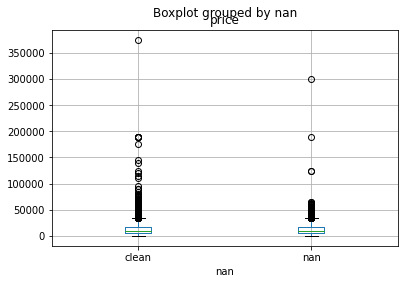

In [176]:
# Creamos una nueva columna para separar el tipo de datos de odometer
vehicles['nan'] = "nan" #clean representará los datos que tienen valores ausentes
vehicles['nan'] = vehicles['nan'].where(vehicles['odometer'].isnull(), 'clean') # reemplazamos los valores donde no sea ausente por "clean"
vehicles.boxplot(column='price', by='nan')

La agrupación de precios se ve similar. Vamos a reducir el rango para apreciar de mejor manera.

<AxesSubplot:title={'center':'price'}, xlabel='nan'>

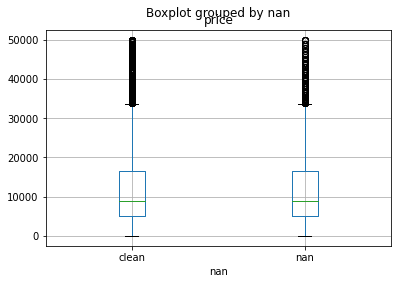

In [177]:
vehicles.query('price < 50000').boxplot(column='price', by='nan')

La distribución de los precios tanto en valores con o sin valores ausentes en odometer, es practicamente la misma. Vamos a analizarlo con las otras variables.

<AxesSubplot:title={'center':'price'}, xlabel='nan'>

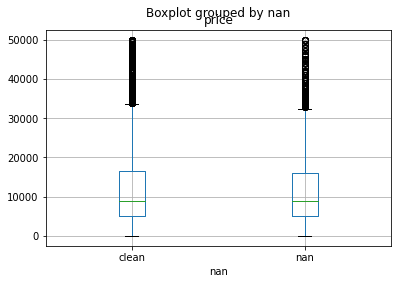

In [178]:
vehicles['nan'] = "nan"
vehicles['nan'] = vehicles['nan'].where(vehicles['cylinders'].isnull(), 'clean') # reemplazamos los valores donde no sea ausente por "clean"
vehicles.query('price < 50000').boxplot(column='price', by='nan')

De acuerdo a los valores ausentes de cylinder, la distribución de precios también es similar. Vemos a continuación nuestro último caso.

<AxesSubplot:title={'center':'price'}, xlabel='nan'>

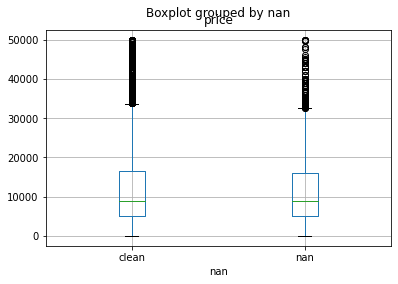

In [179]:
vehicles['nan'] = "nan"
vehicles['nan'] = vehicles['nan'].where(vehicles['model_year'].isnull(), 'clean') # reemplazamos los valores donde no sea ausente por "clean"
vehicles.query('price < 50000').boxplot(column='price', by='nan')

Con esto demostramos que en los datos que existen valores ausentes, la distribución de precios es la misma que en la que existen datos completos. No representan mayores anomalías así que pasaremos a tratar estos valores ausentes para reemplazarlos acorde a una característica significativa que pueda influir en ellos.

### Valores ausentes en Model_year

¿De qué variable depende el año del modelo? o ¿con qué variable puede estar más estrechamente relacionada?. Cuando nos hacemos esta pregunta, podemos pensar en estas otras variables involucradas en los datos:

 -  **model:** Por simple suposición debería ser la variable que mayor relación tenga. Vendrían a ser características casi unidas.
 -  **condition:** Es posible que la condición del vehículo en la medida que los años pasen (a menos de que el vehículo se conserve muy bien).
 -  **transmission:** En la medida que los años han pasado, puede que haya incrementado la producción de autos más modernos (automáticos)
 -  **type:** Las tendencias mundiales en el tipo de vehículo puede ser un indicador claro en el paso del tiempo.


Comenzaremos con la relación de model_year con model.

#### Model_year en relación a model

Crearemos un nuevo conjunto de datos sin los valores ausentes de model_year, pero antes, agruparemos los valores de model para reducir la cantidad de datos en el análisis.

In [180]:
# Cargamos una lista de todos los modelos de autos presentes
vehicles['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [181]:
# Número de modelos distintos
vehicles['model'].nunique()

100

Contamos con 100 modelos distintos. Si analizamos en detalle sus nombres, podemos ver que hay algunos duplicados implícitos en los modelos Ford:

 - ford f150 y ford f-150
 - ford f250 y ford f-250 
 - ford f-250 sd, ford f-250 super duty y ford f250 super duty
 - ford f-350 sd y ford f350 super duty


In [182]:
# Hacemos las correcciones necesarias
vehicles['model'] = vehicles['model'].replace('ford f-150', 'ford f150')
vehicles['model'] = vehicles['model'].replace('ford f-250', 'ford f250')
vehicles['model'] = vehicles['model'].replace(['ford f-250 sd', 'ford f-250 super duty', 'ford f250 super duty'], 'ford f250 sd')
vehicles['model'] = vehicles['model'].replace(['ford f-350 sd', 'ford f350 super duty'], 'ford f350 sd')
# Comprobamos los cambios
vehicles['model'].nunique()

95

Con esta medida se redujo en 5 la cantidad de modelos.

Ahora, una buena medida sería agruparlos por marca de vehículo (debido a la gran cantidad de modelos), esto falicitará nuestro análisis.

**Agruparemos los modelos por empresa manufacturadora. Los grupos quedarán distribuídos de la siguiente forma:**


**bmw**
 - bmw x5
 
**general motors**
 - buick enclave
 - cadillac
 - gmc acadia(general motors)
 - gmc sierra
 - gmc sierra 1500
 - gmc sierra 2500hd
 - gmc yukon

**chevrolet**
 - chevrolet camaro
 - chevrolet camaro lt coupe 2d
 - chevrolet colorado
 - chevrolet corvette
 - chevrolet cruze
 - chevrolet equinox
 - chevrolet impala
 - chevrolet malibu
 - chevrolet silverado
 - chevrolet silverado 1500
 - chevrolet silverado 1500 crew
 - chevrolet silverado 2500hd
 - chevrolet silverado 3500hd
 - chevrolet suburban
 - chevrolet tahoe
 - chevrolet trailblazer
 - chevrolet traverse

**chrysler**
 - chrysler 200
 - chrysler 300
 - chrysler town & country

**dodge**
 - dodge charger
 - dodge dakota
 - dodge grand caravan

**ford**
 - ford econoline
 - ford edge
 - ford escape
 - ford expedition
 - ford explorer
 - ford f150
 - ford f150 supercrew cab xlt
 - ford f250
 - ford f250 sd
 - ford f350
 - ford f350 sd
 - ford focus
 - ford focus se
 - ford fusion
 - ford fusion se
 - ford mustang
 - ford mustang gt coupe 2d
 - ford ranger
 - ford taurus

**honda**
 - acura tl
 - honda accord 
 - honda civic
 - honda civic lx 
 - honda cr-v 
 - honda odyssey 
 - honda pilot

**hyundai**
 - hyundai elantra
 - hyundai santa fe
 - hyundai sonata

**jeep**
 - jeep cherokee
 - jeep grand cherokee
 - jeep grand cherokee laredo
 - jeep liberty
 - jeep wrangler
 - jeep wrangler unlimited
 
**kia**
 - kia sorento
 - kia soul

**mercedes-benz**
 - mercedes-benz benze sprinter 2500

**nissan**
 - nissan altima
 - nissan frontier
 - nissan frontier crew cab sv
 - nissan maxima
 - nissan murano
 - nissan rogue
 - nissan sentra
 - nissan versa

**ram trucks**
 - ram 1500
 - ram 2500
 - ram 3500
 
**subaru**

 - subaru forester
 - subaru impreza
 - subaru outback
 
**toyota**
 - toyota 4runner
 - toyota camry
 - toyota camry le
 - toyota corolla
 - toyota highlander
 - toyota prius
 - toyota rav4
 - toyota sienna
 - toyota tacoma
 - toyota tundra

**volkswagen**
 - volkswagen jetta
 - volkswagen passat

Ahora vamos a crear una nueva columna "manufacturer" para agrupar los nombres de los modelos.

In [183]:
vehicles['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f150', 'ford f150 supercrew cab xlt',
       'ford f250', 'ford f250 sd', 'ford f350', 'ford f350 sd',
       'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
       'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger',
     

In [184]:
# Asignamos cada nombre a su respectivo grupo
bmw = 'bmw x5'


chevrolet = ['chevrolet camaro', 'chevrolet camaro lt coupe 2d','chevrolet colorado', 'chevrolet corvette', 
             'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu','chevrolet silverado',
             'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 
             'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer',
             'chevrolet traverse'
]

chrysler = ['chrysler 200', 'chrysler 300', 'chrysler town & country']

dodge = ['dodge charger', 'dodge dakota', 'dodge grand caravan']

ford = ['ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f150', 
        'ford f150 supercrew cab xlt','ford f250', 'ford f250 sd', 'ford f350', 'ford f350 sd',
        'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
        'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger',
        'ford taurus'
]

general_motors = ['buick enclave', 'cadillac escalade', 'gmc acadia', 'gmc sierra', 'gmc sierra 1500', 
                  'gmc sierra 2500hd', 'gmc yukon'
]

honda = ['acura tl', 'honda accord', 'honda civic', 'honda civic lx', 'honda cr-v', 'honda odyssey', 'honda pilot']

hyundai = ['hyundai elantra', 'hyundai santa fe', 'hyundai sonata']

jeep = ['jeep cherokee', 'jeep grand cherokee', 'jeep grand cherokee laredo', 'jeep liberty', 'jeep wrangler', 
        'jeep wrangler unlimited'
]

kia = ['kia sorento', 'kia soul']

mercedes_benz = ['mercedes-benz benze sprinter 2500']

nissan = ['nissan altima', 'nissan frontier', 'nissan frontier crew cab sv', 'nissan maxima', 'nissan murano',
          'nissan rogue', 'nissan sentra', 'nissan versa'
]

ram_trucks = ['ram 1500', 'ram 2500', 'ram 3500']

subaru = ['subaru forester', 'subaru impreza', 'subaru outback']

toyota = ['toyota 4runner', 'toyota camry', 'toyota camry le', 'toyota corolla', 'toyota highlander', 'toyota prius',
          'toyota rav4', 'toyota sienna', 'toyota tacoma', 'toyota tundra'
]

volkswagen = ['volkswagen jetta', 'volkswagen passat']



In [185]:
# Función para asignar los grupos
def assign_manufacturer_group(name):
    
    if name in bmw:
        return 'bmw'
    elif name in chevrolet:
        return 'chevrolet'
    elif name in chrysler:
        return 'chrysler'
    elif name in dodge:
        return 'dodge'
    elif name in ford:
        return 'ford'
    elif name in general_motors:
        return 'general motors'
    elif name in honda:
        return 'honda'
    elif name in hyundai:
        return 'hyundai'
    elif name in jeep:
        return 'jeep'
    elif name in kia:
        return 'kia'
    elif name in mercedes_benz:
        return 'mercedes benz'
    elif name in nissan:
        return 'nissan'
    elif name in ram_trucks:
        return 'ram trucks'
    elif name in subaru:
        return 'subaru'
    elif name in toyota:
        return 'toyota'
    else:
        return 'volkswagen'

In [186]:
# Aplicamos la función a la columna de modelos y generamos una nueva columna
vehicles['manufacturer'] = vehicles['model'].apply(assign_manufacturer_group)
# Contamos los valores para cada grupo
vehicles['manufacturer'].value_counts()

ford              12672
chevrolet         10611
toyota             5445
honda              3721
ram trucks         3316
jeep               3281
nissan             3208
general motors     2971
subaru             1272
dodge              1255
hyundai            1173
volkswagen          869
chrysler            838
kia                 585
bmw                 267
mercedes benz        41
Name: manufacturer, dtype: int64

In [187]:
# Damos un vistazo a como queda la nueva tabla
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nan,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,clean,bmw
1,25500,NaN,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,nan,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,clean,hyundai
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,clean,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,clean,chrysler


Ahora que ya tenemos agrupados los modelos, procedemos a analizar el conjunto de datos sin los valores ausentes de model_year.

<AxesSubplot:title={'center':'model year by manufacturer'}, xlabel='manufacturer'>

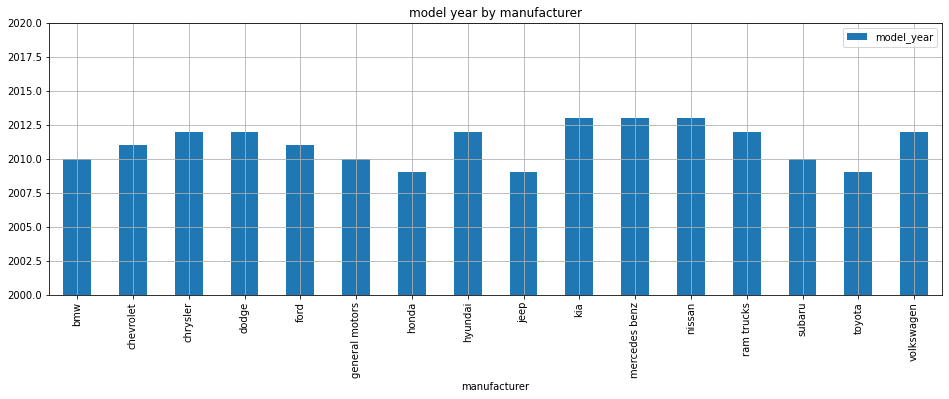

In [188]:
# Creamos un dataframe sin valores ausentes de model_year
vehicles_model_year_clean = vehicles.dropna(subset=['model_year'])
# Creamos una tabla dinámica con los valores medios de model_year(dataframe sin valores ausentes) para cada fabricante.
model_year_median_by_manufacturer = vehicles_model_year_clean.pivot_table(index='manufacturer', values='model_year', aggfunc='median')

# Creamos un gráfico de barras concentrado en medias sobre el año 2000 ya que comprenden más cantidad de datos.
model_year_median_by_manufacturer.plot(y='model_year', kind='bar', ylim=(2000,2020), title='model year by manufacturer', grid='True', figsize=(16,5))

De este gráfico solo podemos concluír cuáles son las marcas que ofrecen modelos de un año más reciente y más antiguo.

Por lo general hay tres marcas que ofrecen vehículos de un modelo posterior al 2012, estas son:
 -  Kia
 -  Mercedes Benz
 -  Nissan

Mientras las que venden modelos más antiguos son:
 -  Honda
 -  Jeep
 -  Toyota
 
Ahora pasaremos a analizar los diagramas de caja por fabricante para observar qué tan distribuídos están sus datos.

<AxesSubplot:title={'center':'model_year'}, xlabel='manufacturer'>

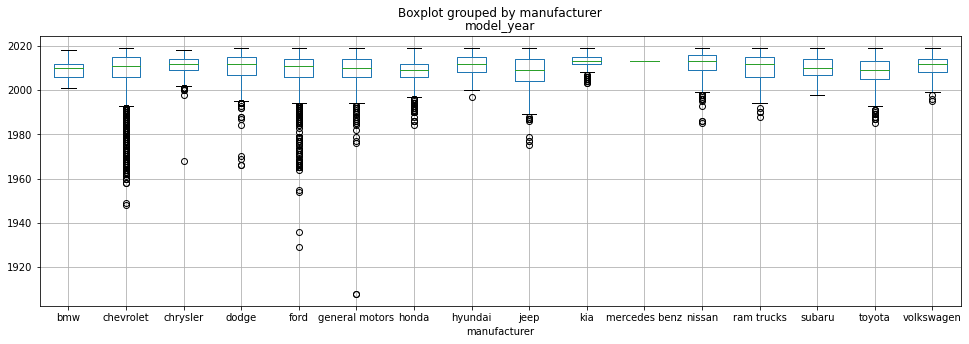

In [189]:
# Creamos diagramas de caja para cada modelo
vehicles_model_year_clean.boxplot(column='model_year', by='manufacturer', grid='True', figsize=(16,5))

Filtraremos por modelos sobre el año 1990, para ver de mejor manera la distribución y sin datos dispersos.

<AxesSubplot:title={'center':'model_year'}, xlabel='manufacturer'>

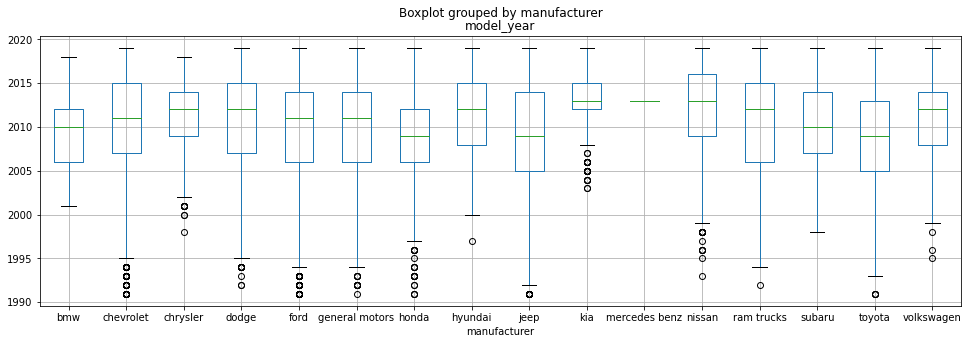

In [190]:
# Creamos diagramas de caja para cada modelo
vehicles_model_year_clean.query('model_year > 1990').boxplot(column='model_year', by='manufacturer', grid='True', figsize=(16,5))

Quizás la mejor manera sería ver la distribución directamente para la variable "model", pero contamos con 95 diferentes modelos, lo cual es demasiado para someter a análisis.

De acuerdo al gráfico tenemos que no existe una distribución ordenada de los datos. No se aprecia claramente una relación directa entre el modelo del vehículo con el año. Esto simplemente puede ser debido a que cada modelo tiene no representa solo un año, si no que existen varios modelos depediendo del año por marca. Por lo tanto, es difícil predecir el año respecto a un modelo en específico.

Seguiremos analizando otras variables.

#### Model_year en relación a condition

<AxesSubplot:title={'center':'model_year'}, xlabel='condition'>

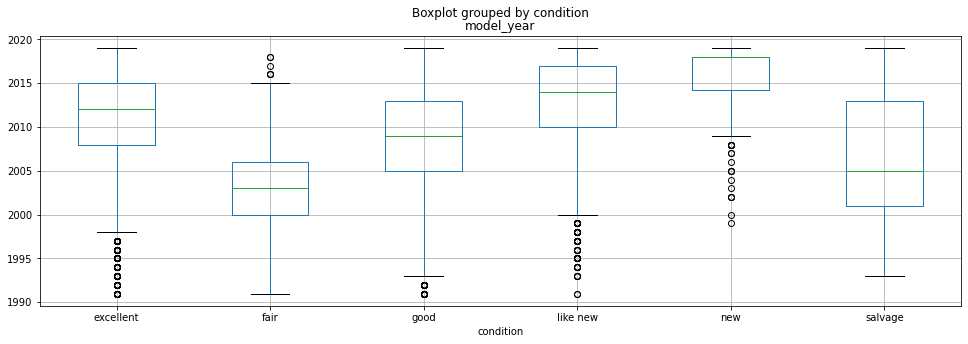

In [191]:
# Creamos diagramas de caja para cada condición
vehicles_model_year_clean.query('model_year > 1990').boxplot(column='model_year', by='condition', grid='True', figsize=(16,5))

Como lo suponíamos, de acuerdo a la condición de los vehículos, el año del modelo varía de forma directa salvo en la condición "para rescate" (salvage), la que suele tener valores más variados.
Dejando este factor de lado, el patrón es que mientras más nuevo es el auto (año del modelo) en mejor condición se va a presentar. El orden que podemos apreciar en el gráfico de forma ascendente es:

 1. fair (razonable)
 2. good (buen estado)
 3. excellent (excelente)
 4. like new (como nuevo)
 5. new (nuevo)
 
La distribución de datos en cada caja es equitativa, salvo en salvage en la que se pueden apreciar mayor dispersión en el 50% de sus datos, además de una mayor amplitud en los años que abarca.
Otro detalle se encuentra en "new", su mediana topa con el límite superior de su caja. Esto indica que al menos el 25% de sus datos se encuentran en la mediana, aproximadamente los años 2017 y 2018.

Ahora crearemos una columna llamada "condition rate" para establecer relaciones de mejor manera.

Para esto primero asignaremos una escala numérica a las condiciones. Se asignará de la siguiente manera:

 -  new = 5
 -  like new = 4
 -  excellent = 3
 -  good = 2
 -  fair = 1
 -  salvage = 0

In [192]:
# Creamos la columna condition_rate a partir de una copia de condition
vehicles['condition_rate'] = vehicles['condition']

# Reemplazamos los antiguos valores por unos numéricos
vehicles['condition_rate'] = vehicles['condition_rate'].replace('new', 5)
vehicles['condition_rate'] = vehicles['condition_rate'].replace('like new', 4)
vehicles['condition_rate'] = vehicles['condition_rate'].replace('excellent', 3)
vehicles['condition_rate'] = vehicles['condition_rate'].replace('good', 2)
vehicles['condition_rate'] = vehicles['condition_rate'].replace('fair', 1)
vehicles['condition_rate'] = vehicles['condition_rate'].replace('salvage', 0)

# Confirmamos los valores de la nueva columna
vehicles['condition_rate'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_rate, dtype: int64

In [193]:
# Actualizamos nuestro dataframe sin valores ausentes para que incluya la nueva columna que creamos
vehicles_model_year_clean = vehicles.dropna(subset=['model_year'])

In [194]:
# Cálculo de la correlación de model_year y condition_rate
vehicles_model_year_clean['model_year'].corr(vehicles_model_year_clean['condition_rate'])

0.282420829384693

Segun la correlación, hay una muy leve dependencia que indique que a mientras mayor sea el año del modelo, mejor va a ser el rating.

<AxesSubplot:xlabel='condition_rate', ylabel='model_year'>

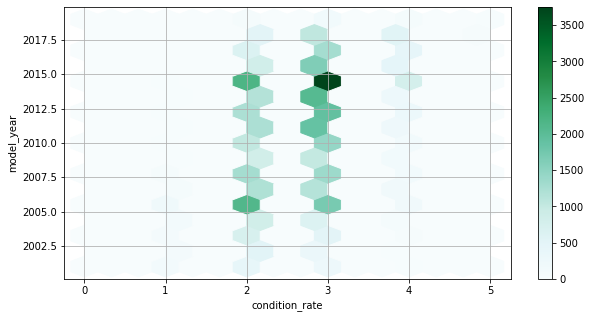

In [195]:
# Creamos un diagrama de contenedores hexagonales para ver la densidad de nuestros datos.
vehicles_model_year_clean.query('model_year > 2000').plot(x='condition_rate', y='model_year', kind='hexbin', gridsize=15, figsize=(10, 5), sharex=False, grid=True)

In [196]:
vehicles_model_year_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nan,manufacturer,condition_rate
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,clean,bmw,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,clean,hyundai,4
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,clean,ford,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,clean,chrysler,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,clean,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,clean,nissan,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,clean,honda,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,clean,hyundai,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,clean,toyota,2


Según el diagráma hexágonal podemos concluir que:

-  Gran parte de sus datos están agrupados entre dos condiciones: Good y excellent.
-  La mayor cantidad de datos se encuentra en la condición excellent y para vehículos de un modelo cercano al año 2014.

Teniendo esto como referencia, chequeamos los diagrámas de cajas de las condiciones Good y excellent.

-  Ambas poseen una distribución relativamente bien proporcionada en al menos el 50% de sus datos, de mejor manera en la condición "good".
-  Debido a la amplitud de años que conforman cada una y la presencia de valores atípicos, la mediana se presenta como mejor representante, tanto para estos conjuntos como para las demás condiciones.

En resumen, a pesar de un índice de correlación un poco bajo, los valores de condition muestran ser una buena referencia para determinar los valores ausentes de model_year, al menos mucho mejores de los que se obtendrían con la columna "model".

Ahora analizaremos con respecto al tipo de transmisión del vehículo.

#### Model_year en relación a transmission

<AxesSubplot:ylabel='transmission'>

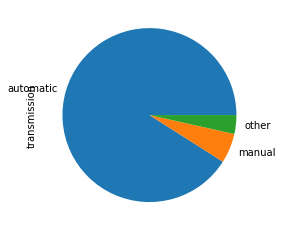

In [197]:
# Creamos un gráfico circular para ver la proporción de las tres variables
vehicles_model_year_clean['transmission'].value_counts().plot(kind='pie', figsize=(4,4))

La gran proporción de datos del tipo de transmisión automática ya nos revela que no nos va a ayudar en nada el guiarnos por esta variable; no nos va a dar mayores indicios de comportamiento para model_year usar la muestra casi completa de los datos, por lo tanto, descartamos el uso de esta característica para rellenar los valores ausentes.

#### Model_year en relación a type

<AxesSubplot:ylabel='type'>

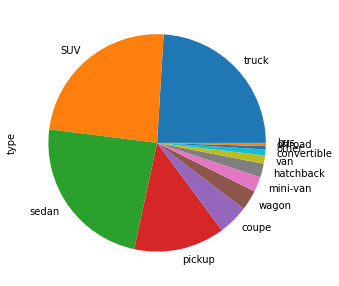

In [198]:
# Creamos un gráfico circular para ver la distribución de sus datos
vehicles_model_year_clean['type'].value_counts().plot(kind='pie', figsize=(5,5))

Al menos acá, los datos si parecen distribuídos de mejor manera para nuestro objetivo. Ahora, analizaremos sus características mediante gráficos de caja.

<AxesSubplot:title={'center':'model_year'}, xlabel='type'>

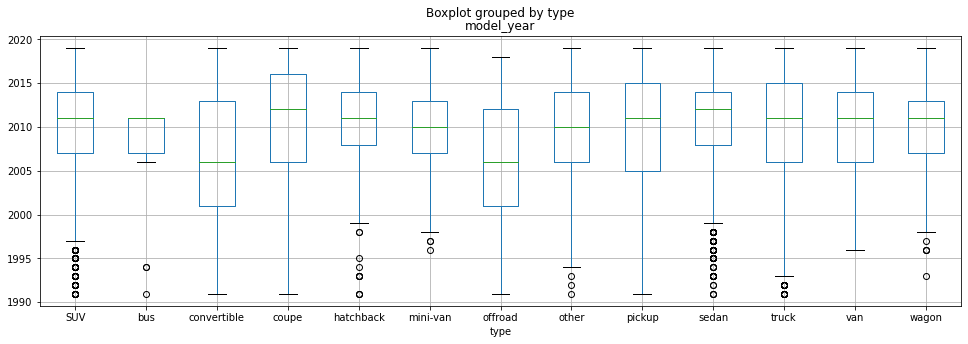

In [199]:
# Creamos diagramas de caja para cada tipo de vehículo
vehicles_model_year_clean.query('model_year > 1990').boxplot(column='model_year', by='type', grid='True', figsize=(16,5))

La distribución es muy variada y nos recuerda a lo que pasaba con "manufacturer", en la que no podíamos apreciar ni un patrón claro. Cada tipo de vehículo comprende un gran margen de años y sus cajas (50% de sus datos) se concentran en periodos similares. 

Las características de type no nos ayudarán a encontrar diferencias claras para rellenar valores ausentes en model_year.

De acuerdo a todos los análisis realizados, determinamos que la mejor forma de **reemplazar valores ausentes en model_year**, sea mediante la **mediana de los valores de condition**. Sin embargo, al tratarse de solo 6 condiciones, la variabilidad puede ser muy amplia lo que no nos permite una imputación robusta.

Agruparemos los datos de acuerdo a la condición y modelo de auto. Esto nos permitirá una mayor precisión en la búsqueda de un valor absoluto adecuado para nuestros valores ausentes.


#### Reemplazo de valores ausentes en model_year

In [200]:
# Calculamos las medianas por condición y modelo
median_modelyear_by_condition_model = vehicles.groupby(by=['condition', 'model'])['model_year'].transform('median')
# Aplicamos las medianas a los valores ausentes
vehicles['model_year'] = vehicles['model_year'].fillna(median_modelyear_by_condition_model)


In [201]:
# Vemos si los valores asuentes fueron reemplazados
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51525 non-null  int64  
 1   model_year      51519 non-null  float64
 2   model           51525 non-null  object 
 3   condition       51525 non-null  object 
 4   cylinders       46265 non-null  float64
 5   fuel            51525 non-null  object 
 6   odometer        43633 non-null  float64
 7   transmission    51525 non-null  object 
 8   type            51525 non-null  object 
 9   paint_color     42258 non-null  object 
 10  is_4wd          51525 non-null  float64
 11  date_posted     51525 non-null  object 
 12  days_listed     51525 non-null  int64  
 13  nan             51525 non-null  object 
 14  manufacturer    51525 non-null  object 
 15  condition_rate  51525 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 6.3+ MB


Tenemos que para seis registros no se pudo calcular una mediana para model_year. Esto se debe a que al considerar el agrupamiento por dos características (condition y model) redujimos nuestra cobertura de datos imputados. 

A continuación, presentamos los datos faltantes.

In [202]:
#Valores ausentes de model_year donde no se pudo calcular la mediana
vehicles.query('model_year.isna()', engine = 'python')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nan,manufacturer,condition_rate
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33,nan,chevrolet,5
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49,nan,general motors,0
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107,nan,volkswagen,5
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23,nan,ford,5
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21,nan,toyota,0
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35,nan,jeep,5


Para reemplazar estos valores ausentes faltantes, usaremos la mediana de los modelos, ya que condition presenta solo los valores de new y condition, lo que implica una variabilidad muy amplia.

In [203]:
# Calculamos las medianas por condición y modelo
median_modelyear_by_model = vehicles.groupby('model')['model_year'].transform('median')
# Aplicamos las medianas a los valores ausentes
vehicles['model_year'] = vehicles['model_year'].fillna(median_modelyear_by_model)

In [204]:
# Vemos nuevamente la información de nuestros datos
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51525 non-null  int64  
 1   model_year      51525 non-null  float64
 2   model           51525 non-null  object 
 3   condition       51525 non-null  object 
 4   cylinders       46265 non-null  float64
 5   fuel            51525 non-null  object 
 6   odometer        43633 non-null  float64
 7   transmission    51525 non-null  object 
 8   type            51525 non-null  object 
 9   paint_color     42258 non-null  object 
 10  is_4wd          51525 non-null  float64
 11  date_posted     51525 non-null  object 
 12  days_listed     51525 non-null  int64  
 13  nan             51525 non-null  object 
 14  manufacturer    51525 non-null  object 
 15  condition_rate  51525 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 6.3+ MB


Ahora si, no nos queda ni un valor nulo en model_year. Pero de seguro vamos a contar con valores decimales debido al cálculo de medianas. ¿Cómo solucionamos esto? Redondearemos al año más proximo.

In [205]:
vehicles['model_year'] = vehicles['model_year'].round()

### Valores ausentes en Odometer


El millaje del vehículo puede depender de distintas variables que poseemos en nuestro conjunto de datos, para ello nos hacemos la pregunta:

**¿El millaje depende de tal variable?**

Entre las que vamos a considerar, están:

 - **model_year:** El millaje puede estar estrechamente relacionado a este factor (por tiempo de uso).
 - **model:** Es posible que ciertos modelos sean vendidos después de un millaje similar (tendremos que analizarlo).
 - **condition:** De acuerdo al millaje alcanzado, la condición del vehículo puede variar; es quizás con la variable que pueda tener mayor relación.
 - **type:** El tipo de vehículo puede estar relacionado al millaje con el que sea vendido. Esta variable representa una naturaleza parecida a model_year y model.

Crearemos un conjunto de datos sin los valores ausentes de odometer, esto para que no afecten a nuestras conclusiones relacionadas a las otras variables.

In [206]:
# Nuevo dataframe sin los valores ausentes de odometer
vehicles_odometer_clean = vehicles.dropna(subset=['odometer'])


Vamos a observar los rangos en que se encuentran agrupados la mayoría de datos.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

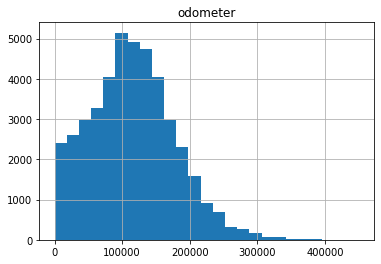

In [207]:
vehicles_odometer_clean.hist('odometer', bins= 25, range=(0,450000))

Sin valores ausentes podemos observar que la mayor cantidad de datos concentra un millaje entre 80 mil y 200 mil.

#### Odometer en relación a model_year

Ahora, analizaremos la relación del millaje por el año del modelo del vehículo. 

Establecemos la mediana por año del modelo. 
**¿Por qué la mediana?**
Esto porque los valores entre un mismo modelo pueden ser muy dispares. Nos podemos encontrar datos dispersos que pueden tender a cambiar bastante la media.

<AxesSubplot:title={'center':'Average odometer by model year'}, xlabel='model_year'>

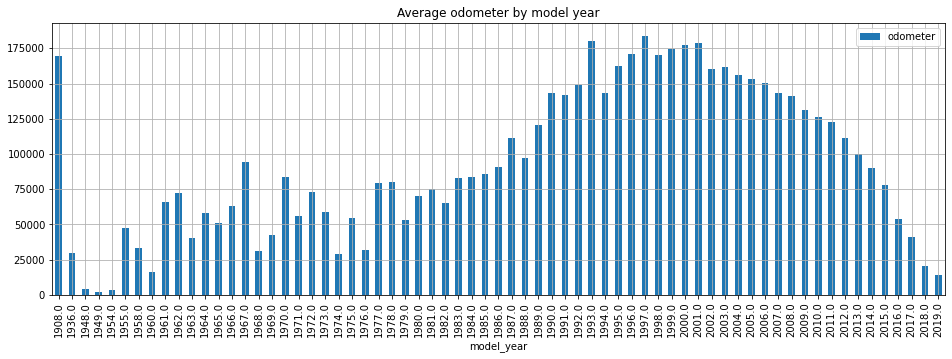

In [208]:
# Creamos una tabla dinámica con los valores medios de odometer para cada año de modelo de autos.
odometer_median_by_model_year = vehicles.pivot_table(index='model_year', values='odometer', aggfunc='median')
# Generamos un gráfico de barras para ver la variación del kilometraje de acuerdo a los años de los modelos.
odometer_median_by_model_year.plot(y='odometer', kind='bar', title='Average odometer by model year', grid='True', figsize=(16,5))

-  El valor medio del millaje se ve en aumento para modelos sobre el año 1983 y experimenta un decrecimiento para modelos post año 2001.
-  Antes de 1990, la media de los datos es dispersa y siempre bajo 110 mil aproximadamente, salvo algunos valores atípicos.
El comportamiento del millaje medio suele mostrar una tendencia clara para los modelos de vehículos del año 1983 en adelante; sin embargo, para modelos de años anteriores se nos hace difícil establecer un patrón claro.

Veamos la correlación que tienen los datos.

In [209]:
# Correlación entre odometer y model_year
vehicles_odometer_clean['odometer'].corr(vehicles_odometer_clean['model_year'])

-0.4657001782977212

Este valor nos indica que hay una conexión pero que no es tan dependiente. Esto confirma lo que pudimos apreciar en el grafico; en la medida que avanzan los años (modelos) si bien hay un crecimiento hasta cierto punto, también hay un decrecimiento; es decir, no hay una relación constante.

Una buena medida será agrupar los datos para ver comportamientos más claro en la dispersión de datos de cada tramo. Esto lo realizaremos en el conjunto de datos original.

<AxesSubplot:>

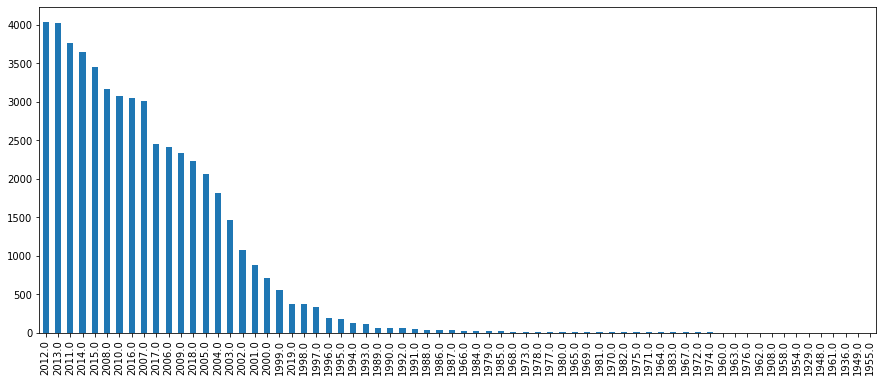

In [210]:
vehicles['model_year'].value_counts().plot(kind='bar', figsize=(15,6))

De acuerdo a la cantidad de datos, generaremos un grupo "top 15" que muestran poseer más de 1000 registros cada uno. Estos valores dentro del top 15 se conservarán, mientras que a los datos restantes, se les asignará un grupo "otros".


In [211]:
# Creamos una lista con los años de modelos que contienen más datos.
model_year_top = [2013, 2012, 2014, 2011, 2015, 2016, 2008, 2010, 2007, 2017, 2006, 2018, 2009, 2005, 2004]
# Creamos una nueva columna para asignar grupo copiando la de model_year.
vehicles['model_year_group'] = vehicles['model_year']
# Reemplazamos los valores que no esten en el la lista model_year_top.
vehicles['model_year_group'] = vehicles['model_year_group'].where(vehicles['model_year'].isin(model_year_top), "otros")
# Mostramos las cinco primeras filas para ver los cambios.
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nan,manufacturer,condition_rate,model_year_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,clean,bmw,2,2011.0
1,25500,2007.0,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,nan,ford,2,2007.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,clean,hyundai,4,2013.0
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,clean,ford,1,otros
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,clean,chrysler,3,2017.0


Nuestra columna funciona bien. Ahora que tenemos los datos más agrupados, realizaremos diagramas de caja para analizar la dispersión de cada conjunto.

<AxesSubplot:title={'center':'odometer'}, xlabel='model_year_group'>

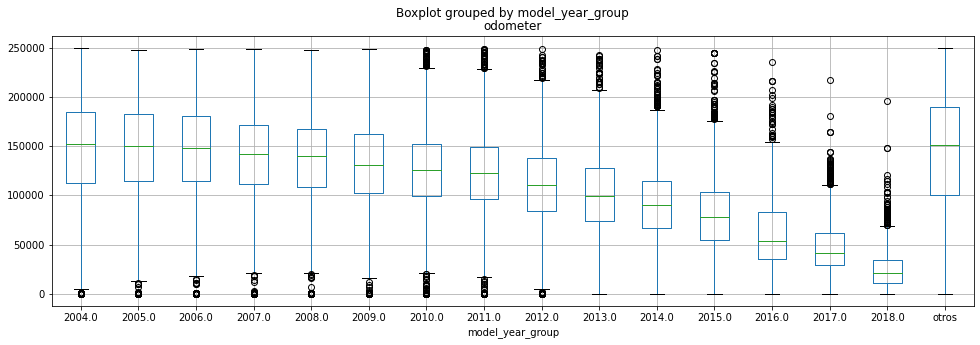

In [212]:
# Actualizamos nuestro dataframe sin valores ausentes para que incluya la nueva columna que creamos
vehicles_odometer_clean = vehicles.dropna(subset=['odometer'])
# Creamos diagramas de caja.
vehicles_odometer_clean.query('odometer <250000').boxplot(column='odometer', by='model_year_group', grid=True, figsize=(16,5))

Las cajas suelen tener simetría en la distribución del 50% de sus datos, no se aprecia un mayor sesgo inferior o superior; por lo tanto, asoma como buen candidato para reemplazar los valores ausentes.

#### Odometer en relación a model

Ya con los datos ordenados, procedemos a realizar un gráfico para ver la relación del millaje de acuerdo a las marcas de vehículos. 

<AxesSubplot:title={'center':'Average odometer by manufacturer'}, xlabel='manufacturer'>

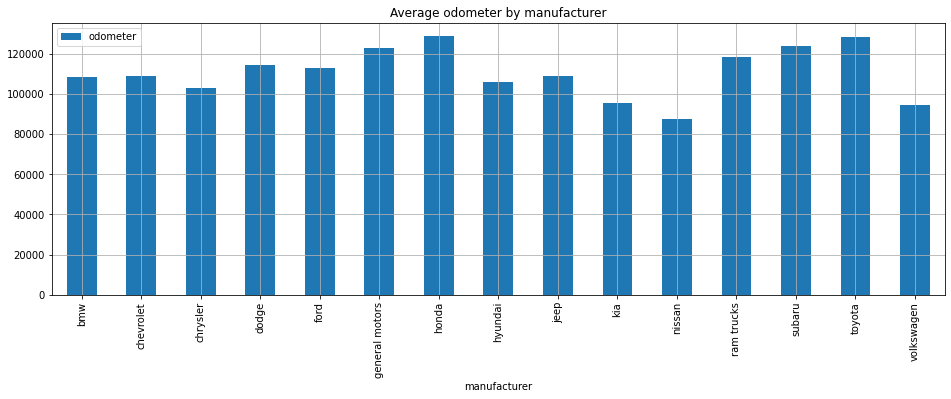

In [213]:
# Creamos una tabla dinámica con los valores medios de odometer(dataframe sin valores ausentes) para cada año de modelo de autos.
odometer_median_by_manufacturer = vehicles_odometer_clean.pivot_table(index='manufacturer', values='odometer', aggfunc='median')
# Generamos un gráfico de barras para ver la variación del kilometraje de acuerdo a los años de los modelos.
odometer_median_by_manufacturer.plot(y='odometer', kind='bar', title='Average odometer by manufacturer', grid='True', figsize=(16,5))

A simple vista podemos observar que sus medianas son similares. Vamos a ver los datos en diagramas de caja para ver con más detalle la dispersión de sus datos. Puede que sus medianas sean similares pero el conjunto del grueso de datos en cada modelo este un poco disperso.

Realizamos gráficos de caja y limitamos los valores de odometer a un máximo de 250000; esto con el fin de enfocarnos en la distribución de al menos el 50% de sus datos, para analizar si contienen algún sesgo o están distribuídos de forma equitativa.

<AxesSubplot:title={'center':'odometer'}, xlabel='manufacturer'>

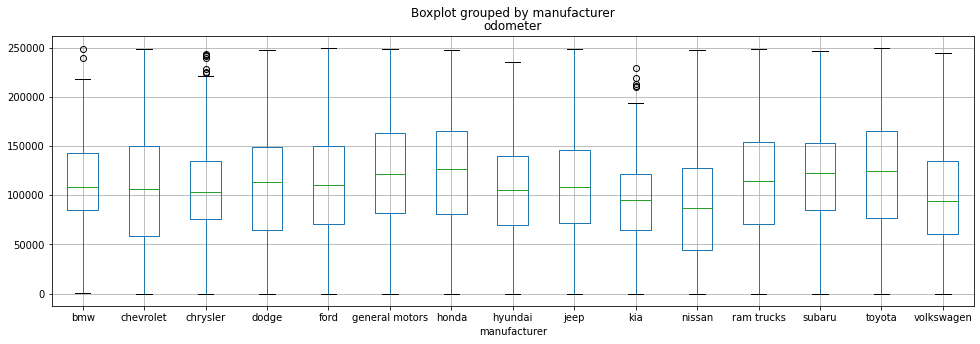

In [214]:
vehicles_odometer_clean.query('odometer <250000').boxplot(column='odometer', by='manufacturer', grid='True', figsize=(16,5))


Si bien no se aprecia un sesgo mayor en el 50% de los datos de cada caso, quizás model_year representa una distribución más equilibrada.

Ahora es el turno de analizar odometer de acuerdo a condition.

#### Odometer en relación a condition

<AxesSubplot:title={'center':'odometer'}, xlabel='condition'>

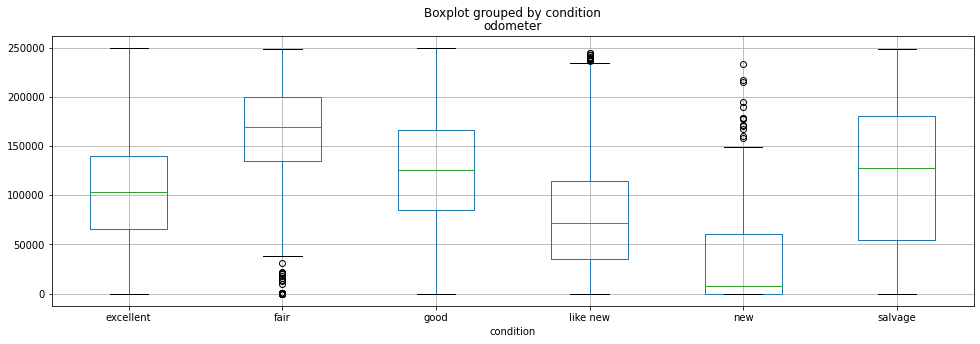

In [215]:
vehicles_odometer_clean.query('odometer <250000').boxplot(column='odometer', by='condition', grid='True', figsize=(16,5))

En la mayoría de los casos, la distribución de los datos es equilibrada. Hay una excepción clara en la categoría "new". Hay un sesgo considerable ya que al menos el 50% de sus datos se aloja bajo el millaje de 10 mil aproximadamente. Otro tramo del 25% comprende los 10 mil hasta los 60 mil aproximadamente.

Sería riesgoso asignar un valor ausente de acuerdo a la condición nuevo; asumiríamos la mediana de 10 mil en millaje, pero la distribución media de datos en gran parte abarca desde los 10 mil a 50 mil de millaje.

Analizaremos el valor de la correlación entre el millaje y la condición. 

In [216]:
vehicles_odometer_clean['odometer'].corr(vehicles_odometer_clean['condition_rate'])

-0.29644549062842307

La correlación entre  odometer y condition **es más débil que  odometer y model_year**. Su valor es más cercano a 0, esto quiere decir que hay un menor grado de dependencia.

#### Odometer en relación a type

<AxesSubplot:title={'center':'odometer'}, xlabel='type'>

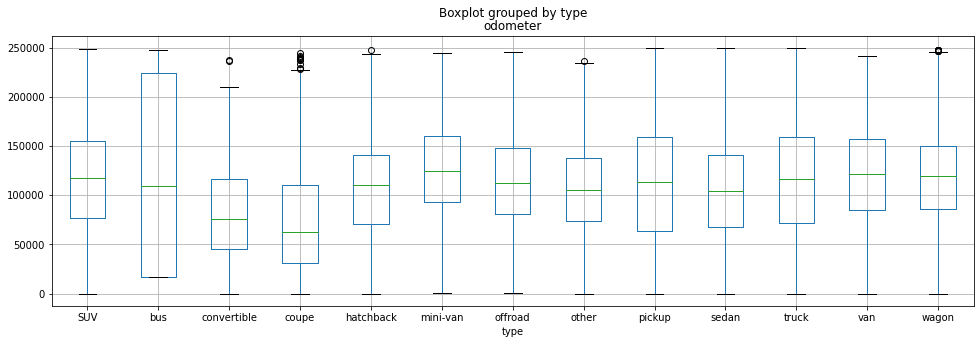

In [217]:
# Creamos diagramas de caja para el tipo de vehículo.
vehicles_odometer_clean.query('odometer <250000').boxplot(column='odometer', by='type', grid='True', figsize=(16,5))

Si bien sus datos presentan una proporción ordenada en la distribución, al igual que en condition, surge una variable en que la caja topa con el límite inferior. En el caso del tipo de vehículo "bus", la distribución del 75% de sus datos contempla un amplio márgen que va desde 0 hasta aproximadamente 225 mil en millaje. Su mediana de 120 mil aproximadamente puede ser poco representativa debido a la dispersión de sus datos.

#### Reemplazo de valores ausentes en odometer

De acuerdo a los análisis vamos a rellenar los valores ausentes de odometer de acuerdo a las medias de model_year.

La decisión de esto se basa en que:

-  Presentan un mejor índice de correlación
-  De acuerdo al ranking creado con mayor cantidad de datos, la mayoría se concentra después del año 2003; esto justo coincide con un claro patrón en el gráfico, a medida que aumenta el año del modelo del auto, el millaje es menor.

Esto último lo recordamos por el siguiente gráfico:

<AxesSubplot:title={'center':'Average odometer by model year 2003-2019'}, xlabel='model_year'>

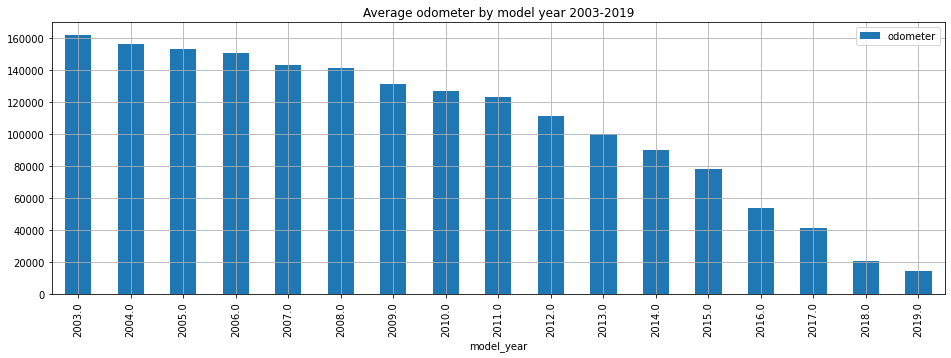

In [218]:
# Mostramos el comportamiento de las medianas desde el año 2003 en adelante.
odometer_median_by_model_year.query('model_year > 2002').plot(y='odometer', kind='bar', title='Average odometer by model year 2003-2019', grid='True', figsize=(16,5))

El comportamiento de la mediana es ordenado y es en este segmento, donde se concentra la mayoría de los datos.

Procedemos entonces a rellenar los valores ausentes de acuerdo a la mediana calculada para cada año.

In [219]:
# Calculamos las medianas por año de modelo y la guardamos en una nueva variable
median_var_by_model = vehicles.groupby('model_year')['odometer'].transform('median')
# Aplicamos las medianas a los valores ausentes
vehicles['odometer'] = vehicles['odometer'].fillna(median_var_by_model) 

In [220]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         46265 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          51524 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       42258 non-null  object 
 10  is_4wd            51525 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  nan               51525 non-null  object 
 14  manufacturer      51525 non-null  object 
 15  condition_rate    51525 non-null  int64  
 16  model_year_group  51525 non-null  object

Podemos ver que solo quedó un valor ausente. Veamos de cual se trata.

In [221]:
#Valores ausentes de odometer donde no se pudo calcular la media
vehicles.query('odometer.isna()', engine = 'python')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,nan,manufacturer,condition_rate,model_year_group
45694,18000,1929.0,ford f150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,clean,ford,2,otros


Tenemos el registro de un modelo del año 1929. Una característica que puede agrupar valores similares puede ser el modelo del vehículo. Por lo tanto, aplicaremos la mediana de millaje para los vehículos ford f150.

In [222]:
fordf150_odometer_median = vehicles.query('model == "ford f150"')['odometer'].median()
vehicles['odometer'] = vehicles['odometer'].fillna(fordf150_odometer_median) 

Con esto ya damos por finalizado el reemplazo de valores ausentes en Odometer.

### Valores ausentes en Cylinder

¿De qué característica puede depender la cantidad de cilindros que tenga el vehículo?

Cuando nos hacemos esta pregunta, las siguientes variables de nuestro conjunto se nos vienen a la mente:

-  model_year
-  model
-  type

Comenzaremos analizando la proporción de datos en nuestra variable.

<AxesSubplot:ylabel='cylinders'>

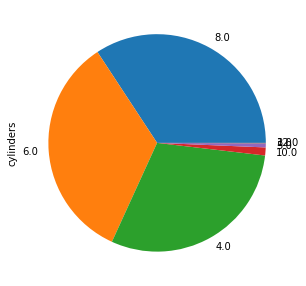

In [223]:
vehicles['cylinders'].value_counts().plot(kind='pie', figsize=(5,5))

Tenemos que gran parte de los datos se concentran en 4, 6 y 8 cilindros. Entre estos tres las porciones son muy parecidas. Algo que tenemos que tener en cuenta a la hora de comparar con otras variables.

#### Cylinders en relación a model_year

In [224]:
# Calculamos la correlación de cylinders con model_year
vehicles['cylinders'].corr(vehicles['model_year'])

-0.14883682848430907

La correlación es cercana al 0, esto quiere decir que es muy débil la dependencia y no hay un patrón claro que nos pueda indicar una tendencia.

Vamos a analizar ahora de acuerdo a los grupos de model_year.

<AxesSubplot:title={'center':'cylinders'}, xlabel='model_year_group'>

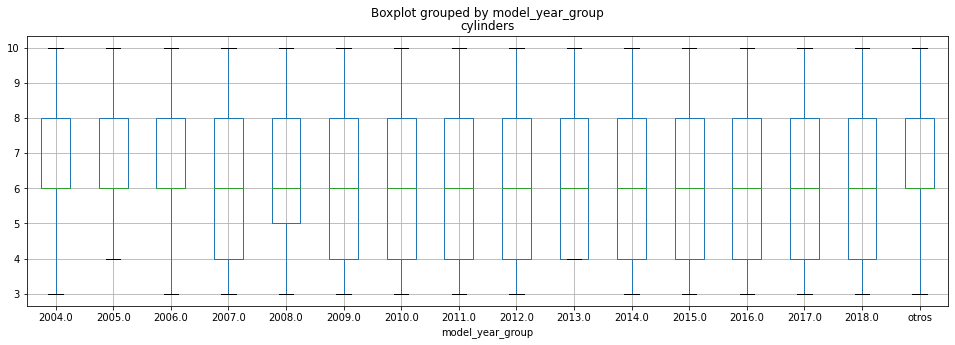

In [225]:
# Creamos un dataframe sin valores ausentes de cylinders para sacar conclusiones más limpias.
vehicles_cylinders_clean = vehicles.dropna(subset=['cylinders'])
# Creamos diagramas de caja.
vehicles_cylinders_clean.query('cylinders <11').boxplot(column='cylinders', by='model_year_group', grid=True, figsize=(16,5))

Es interesante lo que nos muestra este gráfico. 
-  Tal como lo vimos en el gráfico circular, el 50% de los datos se presenta entre 4 y 8 cilindros para casi todos los años.

-  Una misma mediana de 6 cilindros para todos los años. 

-  Están los casos particulares de los años bajo el 2007, quienes presentan el 50% de sus datos entre 6 y 8 cilindros.

A pesar de su correlación baja, los datos se muestran ordenados y distribuidos de forma equitativa.

#### Cylinders en relación a model

Para analizar model, lo haremos mediante la columna "manufacturer" que creamos.

<AxesSubplot:title={'center':'cylinders'}, xlabel='manufacturer'>

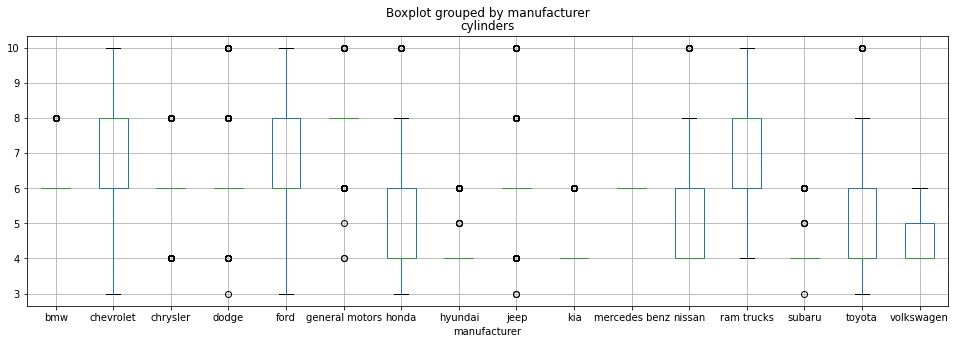

In [226]:
vehicles_cylinders_clean.query('cylinders <11').boxplot(column='cylinders', by='manufacturer', grid=True, figsize=(16,5))

Aquí surge un patrón claro e importante:

 -  Muchas marcas no presentan caja, lo que nos indica que todos sus datos presentan un único valor de cilindros (salvo valores dispersos, lo que puede ser por modelos distintos). 
 -  Se repite la constante de que la mediana para la gran mayoría es 6 cilindros.
 -  Las cajas para cada marca no varían mucho de dos tipos de cilindrada.
 
Hasta el momento esta característica se presenta como la más clara en cuanto a la dependencia de la cantidad de cilindros. Debemos considerar que estamos evaluando por fabricante, al hacerlo por modelo seguramente tendríamos mayor exactitud y mayor correlación.

#### Cylinders en relación a type

<AxesSubplot:title={'center':'cylinders'}, xlabel='type'>

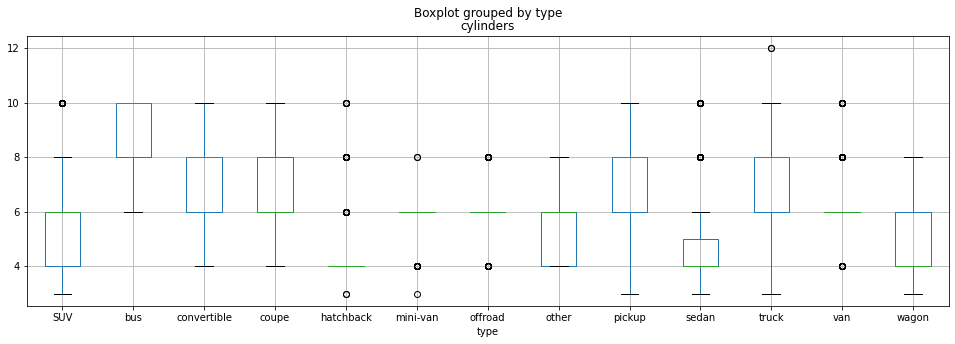

In [227]:
vehicles_cylinders_clean.boxplot(column='cylinders', by='type', grid=True, figsize=(16,5))

Este caso es similar al anterior pero con una menor proporción de casos absolutos, es decir, con menos casos en la que la mediana de cylinders sea estrictamente de un solo valor.

El tipo de vehículo  presenta una mayor variabilidad, por lo tanto, ocuparemos model para reemplazar los valores ausentes.

#### Reemplazo de valores ausentes en cylinder

In [228]:
# Calculamos las medianas por año de modelo y la guardamos en una nueva variable
median_cylinder_by_model = vehicles.groupby('model')['cylinders'].transform('median')
# Aplicamos las medianas a los valores ausentes
vehicles['cylinders'] = vehicles['cylinders'].fillna(median_cylinder_by_model) 

In [229]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         51525 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       42258 non-null  object 
 10  is_4wd            51525 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  nan               51525 non-null  object 
 14  manufacturer      51525 non-null  object 
 15  condition_rate    51525 non-null  int64  
 16  model_year_group  51525 non-null  object

Listo, ya hemos reemplazado a la perfección nuestros valores ausentes en cylinders. Ahora solo nos queda paint_color.

### Valores ausentes en paint_color

Es difícil determinar una variable que pueda incidir en el color de un vehículo. De acuerdo al conjunto de datos solo vemos posible las siguientes:

 - model_year: Debido a modas y tendencias, los colores pueden cambiar con el tiempo.
 - model: Algunos modelos pueden presentarse solo en ciertos colores.
 
 Primero veremos la proporción de colores en todo nuestro conjunto de datos.

<AxesSubplot:ylabel='paint_color'>

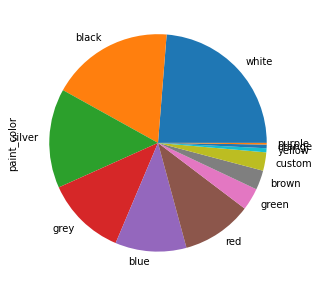

In [230]:
vehicles['paint_color'].value_counts().plot(kind='pie', figsize=(5,5))

In [231]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

-  Tenemos un color que está presente en al menos un 20% de los datos, el blanco.
-  Al menos la mitad de los colores hace presencia de manera considerable en nuestros datos y sobrepasan los 4000 registros.

In [232]:
# Creamos un dataframe sin los valores ausentes de paint_color para trabajar con datos limpios
vehicles_paint_clean = vehicles.dropna(subset=['paint_color'])

#### Paint_color en relación a model_year

Se nos hace complicado generar algún gráfico que pueda analizar esta variable categórica, por lo tanto primero contaremos la cantidad de apariciones del color por cada año.

In [233]:
# Creamos una tabla dinámica para contar los valores
paint_color_by_year = vehicles.pivot_table(index='model_year_group', columns='paint_color', values='price', aggfunc='count')
paint_color_by_year

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
model_year_group,,,,,,,,,,,,
2004.0,221.0,163.0,75.0,58.0,69.0,189.0,4.0,3.0,178.0,286.0,259.0,10.0
2005.0,216.0,213.0,86.0,60.0,89.0,198.0,23.0,3.0,187.0,314.0,307.0,10.0
2006.0,259.0,279.0,62.0,107.0,90.0,238.0,14.0,5.0,218.0,296.0,407.0,8.0
2007.0,375.0,345.0,102.0,93.0,73.0,311.0,8.0,4.0,260.0,397.0,477.0,10.0
2008.0,450.0,360.0,83.0,82.0,62.0,289.0,9.0,17.0,250.0,406.0,618.0,18.0
2009.0,313.0,241.0,53.0,53.0,62.0,242.0,8.0,10.0,161.0,318.0,420.0,16.0
2010.0,391.0,284.0,61.0,68.0,56.0,346.0,18.0,4.0,273.0,468.0,540.0,10.0
2011.0,574.0,312.0,65.0,70.0,87.0,434.0,16.0,3.0,239.0,484.0,821.0,7.0
2012.0,734.0,300.0,56.0,66.0,82.0,405.0,19.0,8.0,341.0,521.0,791.0,3.0


-  De acuerdo a la tabla, es difícil establecer un patrón de comportamiento para la elección de color de vehículo. 
-  A través del tiempo se sostiene el color blanco. 
-  La proporción de colores que pudimos observar en el gráfico circular se repite para cada año de modelo.

Generaremos una tabla con el color favorito por año.

In [234]:
# Generamos una tabla con el color que se repite más para cada modelo
color_max_values_by_year= paint_color_by_year.idxmax(axis=1)
color_max_values_by_year

model_year_group
2004.0    silver
2005.0    silver
2006.0     white
2007.0     white
2008.0     white
2009.0     white
2010.0     white
2011.0     white
2012.0     white
2013.0     white
2014.0     white
2015.0     white
2016.0     white
2017.0     black
2018.0     white
otros      white
dtype: object

Es complicado establecer una relación clara, la única opción más viable es atribuir un color de moda por año.

A simple vista la tabla nos muestra una predilección por el blanco lo que no representa el gráfico circular, en el cual observamos que hay al menos 4 colores bastante usados.

Vamos a ver si las proporciones de colores se mantienen para cada modelo de auto o se mantienen similares como en model_year.

#### Paint_color en relación a model

Analizamos las cantidades de acuerdo a nuestros datos de manufacturer para reducir la cantidad de categorías.

In [235]:
# Creamos una tabla dinámica para contar los colores por modelo
paint_color_by_manufacturer = vehicles.pivot_table(index='manufacturer', columns='paint_color', values='price', aggfunc='count')
paint_color_by_manufacturer


paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
manufacturer,,,,,,,,,,,,
bmw,66.0,16.0,6.0,2.0,5.0,42.0,NaN,1.0,1.0,32.0,38.0,NaN
chevrolet,1683.0,891.0,226.0,274.0,189.0,858.0,38.0,23.0,1008.0,1192.0,2260.0,54.0
chrysler,158.0,110.0,11.0,16.0,15.0,90.0,NaN,NaN,69.0,110.0,118.0,2.0
dodge,192.0,119.0,16.0,35.0,18.0,122.0,7.0,2.0,125.0,161.0,218.0,5.0
ford,1739.0,975.0,296.0,224.0,344.0,1023.0,71.0,15.0,1287.0,1110.0,3170.0,123.0
general motors,503.0,210.0,92.0,89.0,47.0,253.0,22.0,16.0,165.0,262.0,787.0,2.0
honda,548.0,464.0,168.0,72.0,105.0,595.0,3.0,6.0,182.0,574.0,345.0,10.0
hyundai,154.0,177.0,28.0,31.0,20.0,136.0,1.0,3.0,99.0,196.0,115.0,1.0
jeep,623.0,222.0,57.0,73.0,189.0,243.0,62.0,6.0,342.0,415.0,398.0,41.0


In [236]:
# Generamos una tabla con el color que se repite más para cada modelo
color_max_values_by_manufacturer= paint_color_by_manufacturer.idxmax(axis=1)
color_max_values_by_manufacturer

manufacturer
bmw                black
chevrolet          white
chrysler           black
dodge              white
ford               white
general motors     white
honda               grey
hyundai           silver
jeep               black
kia                white
mercedes benz      black
nissan             black
ram trucks         white
subaru            silver
toyota            silver
volkswagen         black
dtype: object

Esta tabla a diferencia de la vista en model_year, refleja de mejor forma lo que vimos en nuestro gráfico circular. 


#### Reemplazo de valores ausentes en paint_color

De acuerdo a las relaciones que tiene la variable con las características de modelo y año, vemos conveniente no realizar una imputación de acuerdo a estimaciones. No tenemos una variable que realmente nos ayude a predecir el color del vehículo. Por lo tanto, para los valores ausentes crearemos una nueva categoría llamada "unknown".

In [237]:
# Aplicamos las medianas a los valores ausentes
vehicles['paint_color'] = vehicles['paint_color'].fillna('unknown') 
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         51525 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       51525 non-null  object 
 10  is_4wd            51525 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  nan               51525 non-null  object 
 14  manufacturer      51525 non-null  object 
 15  condition_rate    51525 non-null  int64  
 16  model_year_group  51525 non-null  object

Listo, ya no contamos con valores ausentes en nuestro conjunto de datos.

Ahora pasamos a ajustar los datos y limpiar cualquier cosa que pueda perjudicar nuestros análisis a futuro.

## Corregir los tipos de datos

### Eliminación de columnas

Comenzaremos por eliminar la columna "nan" que creamos en un comienzo.

In [238]:
# Eliminamos columnas
vehicles = vehicles.drop(
    ['nan'], 
     axis=1
)
# Mostramos como queda el dataframe
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,condition_rate,model_year_group
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,bmw,2,2011.0
1,25500,2007.0,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford,2,2007.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai,4,2013.0
3,1500,2003.0,ford f150,fair,8.0,gas,161683.5,automatic,pickup,unknown,0.0,2019-03-22,9,ford,1,otros
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler,3,2017.0


Dejamos las siguientes columnas ya que consideramos que pueden ser de ayuda para nuestro análisis:

 -  model_year_group
 -  manufacturer
 -  condition_rate

### Tipo de datos

In [239]:
# Tipo de datos is_4wd
vehicles['is_4wd'] = vehicles['is_4wd'].astype('bool')
# Tipo de datos model_year
vehicles['model_year'] = vehicles['model_year'].astype('int')
# Tipo de datos cylinders
vehicles['cylinders'] = vehicles['cylinders'].astype('int')
#Vemos como quedan nuestros datos
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  int64  
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         51525 non-null  int64  
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       51525 non-null  object 
 10  is_4wd            51525 non-null  bool   
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  manufacturer      51525 non-null  object 
 14  condition_rate    51525 non-null  int64  
 15  model_year_group  51525 non-null  object 
dtypes: bool(1), float64(1), int64(5), object

Corroboramos que los valores de is_4wd, model_year y cylinders pasaron a ser enteros.

### Tipo de datos date_posted

Otro de los problemas que observamos en un principio fue el tipo de datos de la fecha. Cambiaremos estos valores a formato datetime.

In [240]:
# Mostramos algunos valores para ver la estructura de sus datos
vehicles['date_posted'].value_counts()

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [241]:
# Aplicamos formato de datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')

In [242]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  manufacturer      51525 non-null  object        
 14  condition_rate    5152

Listo, ya hemos corregido todos los datos que nos quedaban pendientes. Recordamos que ya habíamos hecho algunas correcciones a columnas como model en las que eliminamos duplicados implícitos.

### Comprobación de duplicados

Comprobamos si nuestro conjunto de datos presenta duplicados.

In [243]:
vehicles.duplicated().sum()

0

No tenemos registros duplicados. Con esto damos por concluída la correción de datos.

## Enriquecer datos

Veamos como queda nuestra columna para ver si podemos añadir algún dato relevante para el estudio.

In [244]:
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,condition_rate,model_year_group
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,bmw,2,2011.0
1,25500,2007,ford f150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,ford,2,2007.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,hyundai,4,2013.0
3,1500,2003,ford f150,fair,8,gas,161683.5,automatic,pickup,unknown,False,2019-03-22,9,ford,1,otros
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,chrysler,3,2017.0


Podemos desarrollar con mayor detalle la característica de fecha en que se publicó cada vehículo.

Una buena medida sería crear una columna con:
 -  Día de la semana de la punblicación.
 -  Mes de publicación.
 -  Año de publicación. 
 
 Estos detalles nos podrían dar indicios de factores de venta de los vehículos, ya sea por estacionalidad, situación económica de un año en particular, etc.

### Nuevas columnas relacionadas con fecha

In [245]:
# Agregamos una columna para el día de la semana en que fue publicado el vehículo
vehicles['day_posted'] = vehicles['date_posted'].dt.weekday
# Agregamos una columna para el mes en que fue publicado el vehículo
vehicles['month_posted'] = vehicles['date_posted'].dt.month
# Agregamos una columna para el año en que fue publicado el vehículo
vehicles['year_posted'] = vehicles['date_posted'].dt.year

In [246]:
# Vemos como quedan nuestras nuevas columnas
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,condition_rate,model_year_group,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,bmw,2,2011.0,5,6,2018
1,25500,2007,ford f150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,ford,2,2007.0,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,hyundai,4,2013.0,3,2,2019
3,1500,2003,ford f150,fair,8,gas,161683.5,automatic,pickup,unknown,False,2019-03-22,9,ford,1,otros,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,chrysler,3,2017.0,1,4,2019


Ya que tenemos las características de las fechas, existe otra fecha en nuestro conjunto de datos que nos puede dar cierta información relacionada. Esta es el año del modelo del auto.

Calcularemos los años del vehículo cuando el anuncio fue publicado. 

### Edad del vehículo

In [247]:
# Agrega los años del vehículo cuando el anuncio se colocó
vehicles['model_year_datetime'] = pd.to_datetime(vehicles['model_year'], format='%Y')
vehicles['vehicle_age'] = (vehicles['date_posted'] - vehicles['model_year_datetime']) / pd.Timedelta('365 days')
vehicles['vehicle_age'].value_counts()

6.038356     26
7.139726     23
8.221918     22
7.257534     21
7.758904     21
             ..
20.742466     1
20.200000     1
18.687671     1
17.345205     1
32.191781     1
Name: vehicle_age, Length: 8492, dtype: int64

Ya tenemos el tiempo en años de forma precisa para cada vehículo hasta que fue publicado. Ahora eliminamos la columna model_year_datetime que habíamos creado para hacer la operación.

In [248]:
# Eliminamos la columna
vehicles = vehicles.drop(['model_year_datetime'], axis=1)

Aprovechando que tenemos la edad del vehículo hasta que fue publicado, podemos calcular el promedio de millaje anual.

### Millaje anual

In [249]:
# Millaje por año
vehicles['yearly_odometer'] = vehicles['odometer'] / vehicles['vehicle_age']
# Mostramos la tabla
vehicles.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,manufacturer,condition_rate,model_year_group,day_posted,month_posted,year_posted,vehicle_age,yearly_odometer
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,bmw,2,2011.0,5,6,2018,7.479452,19386.446886
1,25500,2007,ford f150,good,6,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,ford,2,2007.0,4,10,2018,11.805479,7513.883732
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,hyundai,4,2013.0,3,2,2019,6.104110,18020.646320
3,1500,2003,ford f150,fair,8,gas,161683.5,automatic,pickup,unknown,...,2019-03-22,9,ford,1,otros,4,3,2019,16.230137,9961.930706
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,chrysler,3,2017.0,1,4,2019,2.249315,35967.838002


En esta columna pudo haber surgido un error, en el caso de que vehicle_age sea 0, la división no va a ser correcta. Para esta haremos lo siguiente:

In [250]:
vehicles.query('vehicle_age == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,manufacturer,condition_rate,model_year_group,day_posted,month_posted,year_posted,vehicle_age,yearly_odometer
10176,21400,2019,nissan frontier crew cab sv,good,6,gas,30062.0,other,pickup,black,...,2019-01-01,47,nissan,2,otros,1,1,2019,0.0,inf
44517,22100,2019,nissan frontier crew cab sv,good,6,gas,14151.5,other,pickup,white,...,2019-01-01,2,nissan,2,otros,1,1,2019,0.0,inf
50707,17459,2019,dodge grand caravan,excellent,6,gas,47000.0,automatic,van,white,...,2019-01-01,6,dodge,3,otros,1,1,2019,0.0,inf


In [251]:
# Creamomos la condición que almacena todos los valores de vehicle_age distintas a 0.
condition = vehicles.query('vehicle_age !=0')['vehicle_age']
# Si es false, en la columna yerly_odometer se reemplazará por un 0.
vehicles['yearly_odometer'] = vehicles['yearly_odometer'].where(vehicles['vehicle_age'].isin(condition), 0)


Listo, con esto los errores en la división por 0 de vehículos que tengan esa edad, fueron reemplazados con un millaje de 0 anual.

Ya tenemos suficientes datos relacionados a fechas para obtener conclusiones claras en nuestro conjunto de datos.

Ahora miraremos nuestros datos para comprobar que se encuentren limpios.

## Comprobar datos limpios

In [252]:
# Información general/resumida sobre el DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  manufacturer      51525 non-null  object        
 14  condition_rate    5152

In [253]:
# imprimimos una muestra de los datos
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,manufacturer,condition_rate,model_year_group,day_posted,month_posted,year_posted,vehicle_age,yearly_odometer
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,bmw,2,2011.0,5,6,2018,7.479452,19386.446886
1,25500,2007,ford f150,good,6,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,ford,2,2007.0,4,10,2018,11.805479,7513.883732
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,hyundai,4,2013.0,3,2,2019,6.104110,18020.646320
3,1500,2003,ford f150,fair,8,gas,161683.5,automatic,pickup,unknown,...,2019-03-22,9,ford,1,otros,4,3,2019,16.230137,9961.930706
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,chrysler,3,2017.0,1,4,2019,2.249315,35967.838002
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,chrysler,3,2014.0,2,6,2018,4.468493,12969.472716
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,toyota,3,2015.0,3,12,2018,3.989041,19857.403846
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,...,2019-01-07,68,honda,3,2013.0,0,1,2019,6.019178,18187.366864
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,...,2018-07-16,19,kia,3,2012.0,0,7,2018,6.542466,15922.742881
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,...,2019-02-15,17,honda,3,2008.0,4,2,2019,11.131507,13222.917795


## Estudiar parámetros principales

Debemos recordar que nuestro objetivo principal es detectar **qué parametros influyen en el precio de los vehículos** publicados en el sitio web de Crankshaft list.

Vamos a estudiar el comportamiento del precio respecto a ciertos parámetros. Comenzaremos con ciertas variables que se presentan de forma numérica para analizarlas a través de histogramas.

- Precio
- Los años del vehículo cuando el anuncio se colocó (columna vehicle_age)
- Millaje
- Número de cilindros
- Estado (usando la columna condition_rate)

Comenzaremos por ver la distribución de precios en nuestro conjunto de datos.

### Distribución de precios

<AxesSubplot:>

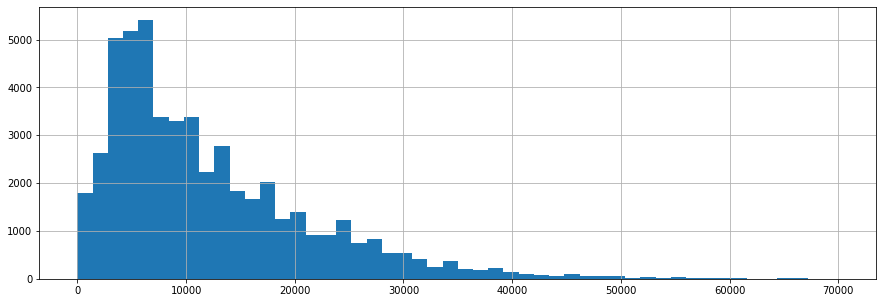

In [254]:
# Histograma del precio
vehicles['price'].hist(bins=50, range=(0,70000), figsize= (15,5) )

Del histograma de precio podemos sacar las siguientes conclusiones:

-  Hay un número considerable de precios cercanos al cero. Será bueno profundizar en este detalle para establecer la naturaleza de estos datos, si se tratan de valores atípicos realmente.

-  Hacia los precios superiores, podemos ver que hay algunos valores atípicos claros sobre el precio de 50 mil.

-  La mayoría de datos se concentran en valores entre 4 mil y 12 mil aproximadamente.

Ahora vamos a ver como se distribuyen los datos de acuerdo a los otros parámetros que habíamos mencionado.

### Distribución de edad, millaje, cilindros y condición

In [255]:
# Creamos una variable para asignar las columnas a graficar
distribution_columns = ['vehicle_age', 'odometer', 'cylinders', 'condition_rate']

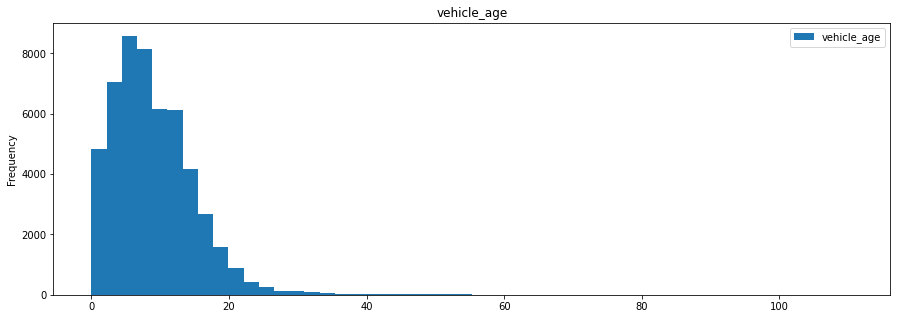

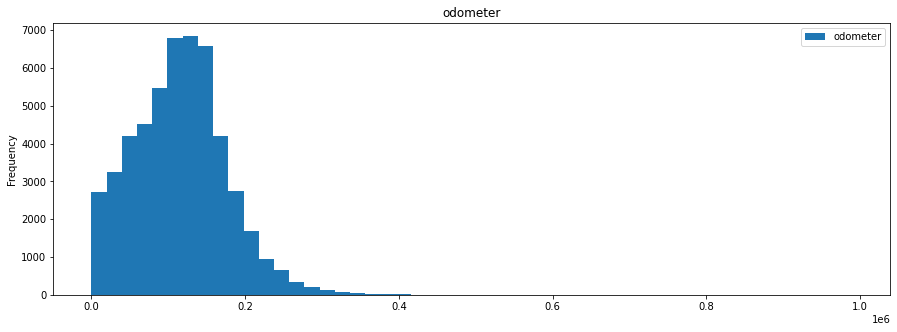

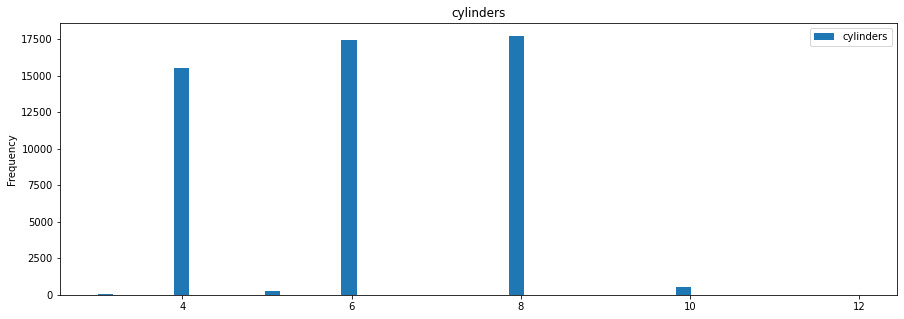

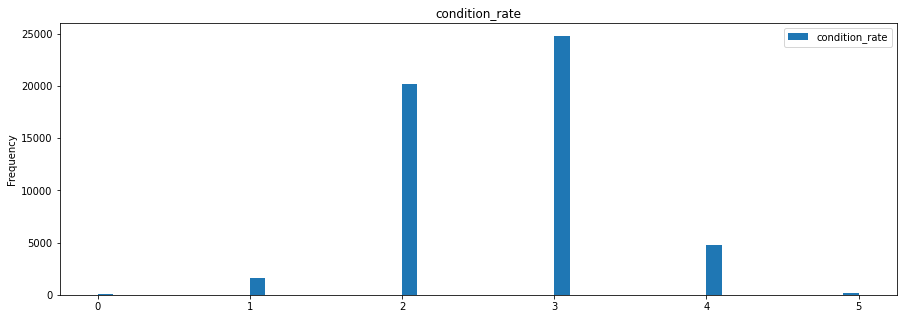

In [256]:
# Creamos un bucle para la generación de gráficos
for name in distribution_columns:
    vehicles.plot(y=name, title= name, kind='hist', bins=50, figsize=(15,5))

**Respecto a la edad de los vehículos podemos decir que:**

-  Gran parte de los datos se concentra entre los 0 y 20 años de edad.
- Existen casos aíslados de vehículos sobre 30 años.

**Respecto al millaje podemos decir que:**

-  Al menos 1500 casos se presentan cercanos o igual a un millaje 0. Esto seguramente tiene relación con los autos nuevos.
-  Hasta el millaje de 0 a 230 mil aproximadamente, se concentra gran parte de los datos. 
-  A partir de los 230 mil en millaje, van bajando constantemente desde los 400 casos por tramo.

**Respecto a la cantidad de cilindros podemos decir que:**

-  En el caso de cilinders se aprecia que los más populares son 8, 6 y 4 cilindros.
-  Para 3 y 12 cilindros ya pasan a ser situaciones bastante atípicas.

**Respecto a la condición podemos decir que:**

- Para condition, tenemos que gran parte de sus datos se concentran entre las condiciones: excellent, good, like new y fair (condition_rate del 1 al 4)
- Solo 258 datos tienen la condición de new y salvage.



## Estudio y tratamiento de valores atípicos


De acuerdo a los histográmas anteriores, tenemos que se presentan valores atípicos que podríamos excluír del análisis. Usaremos las variables de precio, edad del vehículo y millaje para fijar límites superiores e inferiores. Una vez fijados esos límites, crearemos un nuevo conjunto de datos sin valores atípicos.

Dada la condición categórica de condition y cylinders, no consideraremos una reducción de datos de acuerdo a estas variables.

Para tener mayor claridad con los valores atípicos del precio, primero veremos su diagrama de caja.

<AxesSubplot:>

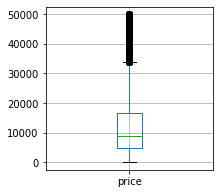

In [257]:
# Diagramde de caja para el precio
vehicles.query('price <50000').boxplot(column='price', grid=True, figsize=(3,3))

De acuerdo al diagrama de caja, tenemos que los valores atípicos de precio son los que sobrepasan los 34 mil aproximadamente.

Veamos ahora el caso de **edad del vehículo**:

<AxesSubplot:>

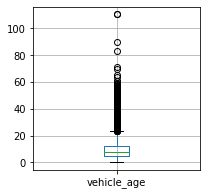

In [258]:
# Diagrama de caja para la edad del vehículo
vehicles.boxplot(column='vehicle_age', grid=True, figsize=(3,3))

Los valores atípicos para las edades de vehículo corresponden a las que pasan de los 22 años aproximadamente.

Ahora vemos nuestro último caso, **el millaje**:

<AxesSubplot:>

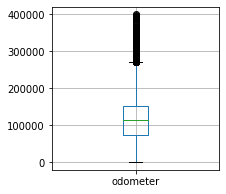

In [259]:
# Diagrama de caja para la edad del vehículo
vehicles.query('odometer <400000').boxplot(column='odometer', grid=True, figsize=(3,3))

Los valores atípicos se presentan aproximadamente sobre los 280 mil en millaje.

Entonces, **¿cómo procederemos a fijar los valores límite para cada variable?**

- Crearemos una función para calcular los bigotes de los diagramas de caja y así establecerlos como límites para filtrar nuestro conjunto de datos.
- El límite inferior se fijará en 0 ya que es el minimo posible debido a las características de los datos y no hay presencia de valores atípicos inferiores.

Crearemos una función para calcular el límite superior:

In [260]:
# Cálculamos el cuartil 1 y 3 para luego establecer el límite superior en la variable maxlim
def maxlim_calculator(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR= q3 - q1
    maxlim = q3+1.5*IQR
    
    return (maxlim)
    

In [261]:
#Aplicamos la función al precio
maxlim_price = maxlim_calculator(vehicles['price'])
maxlim_price


34597.5

In [262]:
#Aplicamos la función a las columnas de vehicle_age y odometer
maxlim_age = maxlim_calculator(vehicles['vehicle_age'])
maxlim_odometer = maxlim_calculator(vehicles['odometer'])

In [263]:
# Edad máxima para vehículos fijada
maxlim_age

23.832876712328765

In [264]:
# Millaje máximo fijado
maxlim_odometer

272007.5

Ya que hemos delimitado el límite superior e inferior, crearemos un nuevo conjunto de datos con el nombre de "vehicles_clean", con los datos que correspondan dentro de estos márgenes.

In [265]:
vehicles_clean = vehicles.query('0 <= price <= @maxlim_price')
vehicles_clean = vehicles_clean.query('0 <= vehicle_age <= @maxlim_age')
vehicles_clean = vehicles_clean.query('0 <= odometer <= @maxlim_odometer')
vehicles_clean.shape

(48385, 21)

**Nuestro conjunto de datos se redujo desde 51525 a 48385 sin los valores atípicos.**

## Estudiar parámetros principales sin valores atípicos

### Precio sin valores atípicos

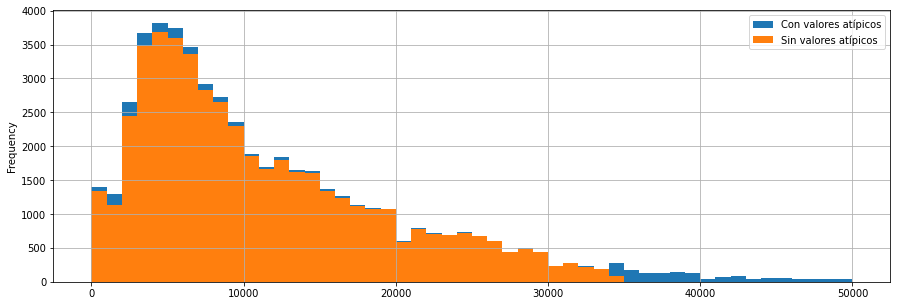

In [266]:
# Histogramas de precio
vehicles['price'].plot(kind='hist', range=(0,50000), bins=50, label='Con valores atípicos', grid=True, figsize=(15,5))
vehicles_clean['price'].plot(kind='hist', range=(0,50000), bins=50, label='Sin valores atípicos', grid=True, figsize=(15,5))
plt.legend()

En el precio tenemos una reducción de sus valores atípicos (superiores a 33 mil aproximadamente) pero también vemos una reducción en valores desde 0 hasta 20 mil principalmente. Esto se debe al filtro que aplicamos a las otras variables; si bien en ellas presentaban valores fuera de lo común, en cuanto al precio formaban parte de la normalidad de los datos.

### Edad del vehículo sin valores atípicos

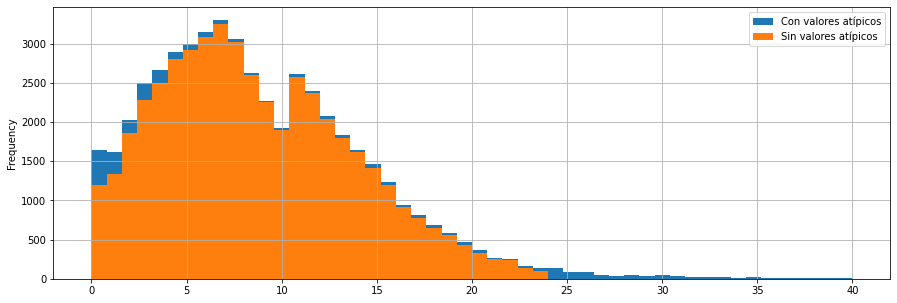

In [267]:
# Histogramas de edad del vehículo
vehicles['vehicle_age'].plot(kind='hist', range=(0,40), bins=50, label='Con valores atípicos', grid=True, figsize=(15,5))
vehicles_clean['vehicle_age'].plot(kind='hist', range=(0,40), bins=50, label='Sin valores atípicos', grid=True, figsize=(15,5))
plt.legend()

De acuerdo a la edad del vehículo se puede ver la marginación de valores sobre 20 años y una reducción parcial en todos los datos debido a las modificaciones. Quizás el dato que se vio más afectado es para los vehículos de edad 0, en el cual sus datos se redujeron en 500 debido a las otras modificaciones.

### Millaje sin valores atípicos

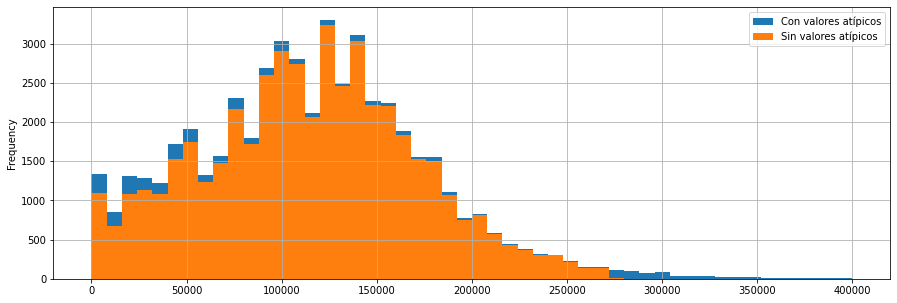

In [268]:
# Histogramas del millaje
vehicles['odometer'].plot(kind='hist', range=(0,400000), bins=50, label='Con valores atípicos', grid=True, figsize=(15,5))
vehicles_clean['odometer'].plot(kind='hist', range=(0,400000), bins=50, label='Sin valores atípicos', grid=True, figsize=(15,5))
plt.legend()

Para el millaje podemos apreciar un comportamiento similar a las otras variables, con mayores diferencias en los tramos iniciales 

## Periodo de colocación de los anuncios


Estudiaremos la cantidad de días en las que los anuncios llevan publicados hasta que se eliminan.

In [269]:
# Calculamos los datos estadísticos básicos
vehicles_clean['days_listed'].describe()

count    48385.000000
mean        39.538452
std         28.208865
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

De acuerdo a la información obtenida, tenemos lo siguiente de un total de 45750 registros:

-  La media es de 39 días y medio
-  La mediana es de 33 días (aproximadamente 1 mes dura la publicación hasta que se elimina)
-  Existe un mínimo de 0 días (se elimina el mismo día)
-  Existe un máximo de 271 días (9 meses hasta que se elimina)

Crearemos un gráfico para entender la frecuencia de esta variable.

<AxesSubplot:title={'center':'Days listed frequency'}, xlabel='days_listed', ylabel='count'>

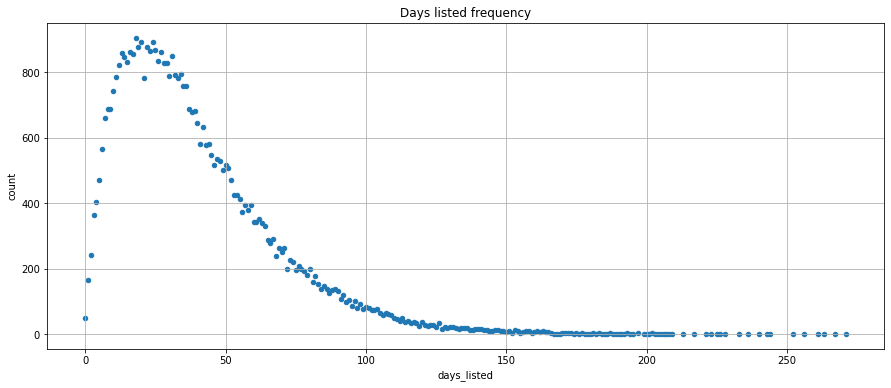

In [270]:
# Creamos una tabla dinámica para contar los valores de days_listed.
days_listed_count = vehicles_clean.pivot_table(index='days_listed', values='price', aggfunc='count')
# Reseteamos el índice de la tabla dinámica y pasamos days_listed como columna
days_listed_count['days_listed'] = days_listed_count.index
days_listed_count = days_listed_count.reset_index(drop=True)
# Cambiamos el nombre de la columna price por count
days_listed_count.rename(columns={'price': 'count'}, inplace=True)
# Creamos un gráfico con los valores
days_listed_count.plot(x='days_listed', y='count', kind='scatter', title='Days listed frequency', grid=True, figsize=(15,6))

Es interesante lo que nos muestra el gráfico:

-  La cantidad de días que se encuentra publicado un vehículo mayormente está entre los rangos de 10 a 40 días.
-  Lo más común es que este publicado un mes, ya después de eso comienza a bajar la cantidad de casos.

Veremos con más detalle el gráfico para ver el comportamiento de publicaciones que fueron finalizadas antes de 60 días.

<AxesSubplot:title={'center':'Days listed frequency'}, xlabel='days_listed', ylabel='count'>

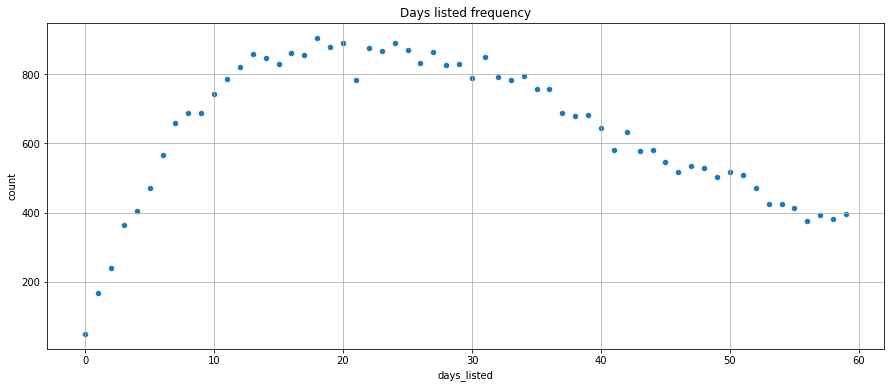

In [271]:
# Comportamiento para la frecuencia de publicaciones con duración menor a 60 días
days_listed_count.query('days_listed <60').plot(x='days_listed', y='count', kind='scatter', title='Days listed frequency', grid=True, figsize=(15,6))

-  Ahora podemos apreciar con más detalle que las publicaciones por lo general duran entre 10 y 30 días.

-  Podríamos decir que nuestros casos de publicaciones rápidas son las que duran menos de 10 días.

-  Nuestros casos lentos son al menos los que duran más de 60 días.


Recordando los valores estadísticos que vimos al inicio de estas observaciones; y considerando la mediana de 33 días (aproximadamente un mes desde que se publica hasta que se elimina), podemos agregar lo siguiente según el gráfico:

-  El primer cuartil corresponde a 19 días, lo que coíncide con uno de los puntos máximos en la cantidad de datos; es decir, la mayoría de las publicaciones duran aproximadamente 19 días.

-  La mediana de 33 días se alinea con un declive en la cantidad de publicaciones; es decir, la cantidad de publicaciones que duran más de un mes, disminuyen de forma lineal.

-  El tercer cuartil corresponde a 53 días. En este punto la cantidad de publicaciones sigue disminuyendo pero no descienden de una forma tan abrupta como en los días posteriores a un mes.

### Publicaciones rápidas

Comenzaremos por estudiar los casos rápidos:

In [272]:
vehicles_clean.query('days_listed < 10').shape

(4297, 21)

Tenemos 4076 casos. ¿Tendrán relación con el precio?, ¿Serán publicados a un precio bajo?

#### Influencia del precio

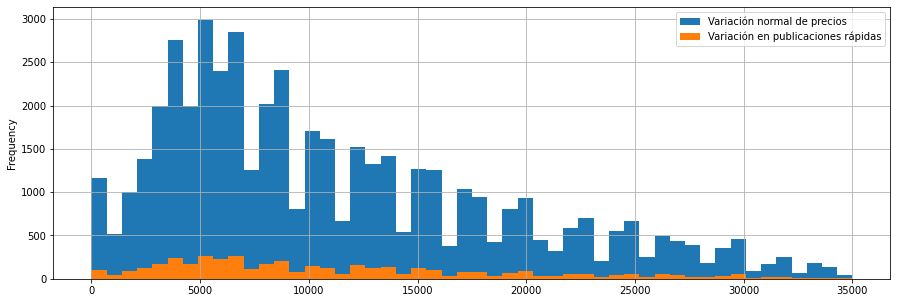

In [273]:
# Comparamos histogramas de la variación de precios.
vehicles_clean['price'].plot(kind='hist', range=(0,35000), bins=50, label='Variación normal de precios', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['price'].plot(kind='hist', range=(0,35000), bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

Las publicaciones rápidas presentan el mismo comportamiento de precios. A simple vista no podemos decir que el precio haya sido un factor influyente.

In [274]:
vehicles_clean.query('days_listed < 10')['price'].describe()

count     4297.000000
mean     11167.894810
std       7787.634037
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15588.000000
max      34500.000000
Name: price, dtype: float64

Esto mismo queda demostrado en sus datos estadísticos, son similares a los de todo el conjunto de datos.

Veamos si la condición es un factor relevante para este tipo de publicaciones.

#### Influencia de la condición

In [275]:
vehicles_clean.query('days_listed < 10')['condition'].value_counts()

excellent    2046
good         1691
like new      414
fair          130
salvage         9
new             7
Name: condition, dtype: int64

In [276]:
vehicles_clean['condition'].value_counts()

excellent    23485
good         19105
like new      4262
fair          1336
salvage        103
new             94
Name: condition, dtype: int64

Las proporciones de los datos son bastante similares, no apreciamos mayores diferencias que puedan indicar que la condición es un factor relevante.

#### Influencia de la antiguedad del vehículo

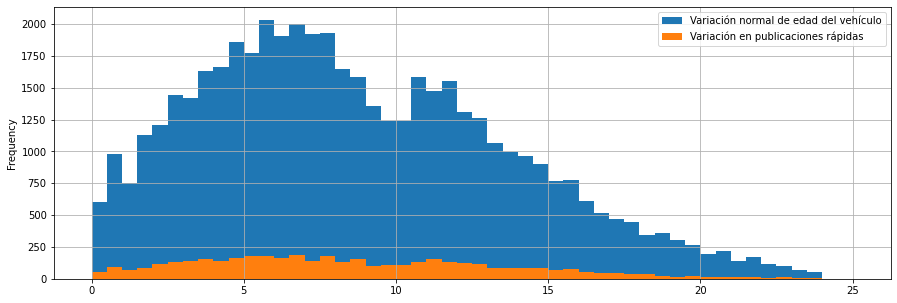

In [277]:
# Histogramas de edad del vehículo
vehicles_clean['vehicle_age'].plot(kind='hist', range=(0,25), bins=50, label='Variación normal de edad del vehículo', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['vehicle_age'].plot(kind='hist', range=(0,25), bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

A diferencia del conjunto de datos total, en las publicaciones rápidas las edades están repartidas de forma más equitativa en cuanto a la cantidad de datos. Por lo tanto no sería para nada un factor determinante ya que no hay edad de vehículo que resalte mucho frente a otras.

#### Influencia del millaje

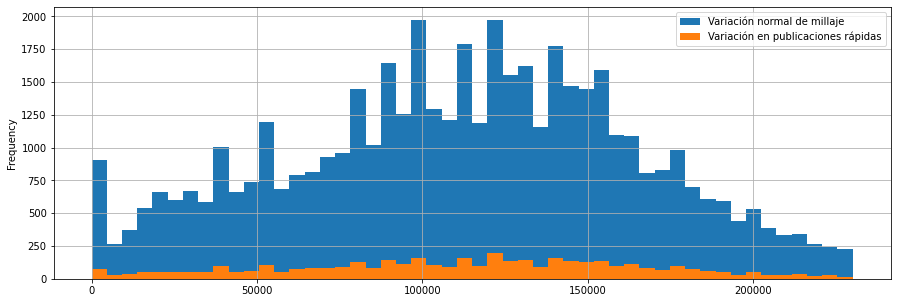

In [278]:
# Histogramas del millaje
vehicles_clean['odometer'].plot(kind='hist', range=(0,230000), bins=50, label='Variación normal de millaje', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['odometer'].plot(kind='hist', range=(0,230000), bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

Al igual que en la antiguedad del vehículo, no hay pruebas claras de que el millaje sea un factor relevante en las publicaciones que duraron menos de 10 días.

#### Influencia de la cantidad de cilindros

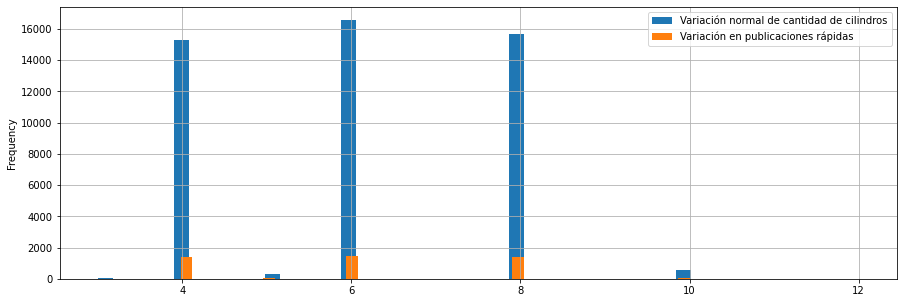

In [279]:
# Histogramas de cylinders
vehicles_clean['cylinders'].plot(kind='hist', bins=50, label='Variación normal de cantidad de cilindros', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['cylinders'].plot(kind='hist', bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

No hay alguna cantidad que resalte en este conjunto de datos filtrado. Por lo tanto, la cantidad de cilindros no sería influyente en las publicaciones rápidas.

Ya analizamos gran parte de las variables cuantitativas y ninguna tiene relación con que una publicación sea rápida. Veamos nuestro conjunto de datos rápidamente para considerar algunas variables categóricas.

In [280]:
vehicles_clean.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,manufacturer,condition_rate,model_year_group,day_posted,month_posted,year_posted,vehicle_age,yearly_odometer
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,bmw,2,2011.0,5,6,2018,7.479452,19386.446886
1,25500,2007,ford f150,good,6,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,ford,2,2007.0,4,10,2018,11.805479,7513.883732
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,hyundai,4,2013.0,3,2,2019,6.104110,18020.646320
3,1500,2003,ford f150,fair,8,gas,161683.5,automatic,pickup,unknown,...,2019-03-22,9,ford,1,otros,4,3,2019,16.230137,9961.930706
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,chrysler,3,2017.0,1,4,2019,2.249315,35967.838002


#### Influencia del mes y día de la semana

Un factor relevante en la cantidad de días de duración de una publicación puede ser la visibilidad que tenga dependiendo del día o estación del año. Analizaremos de acuerdo a días y meses para ver si hay diferencias significativas.

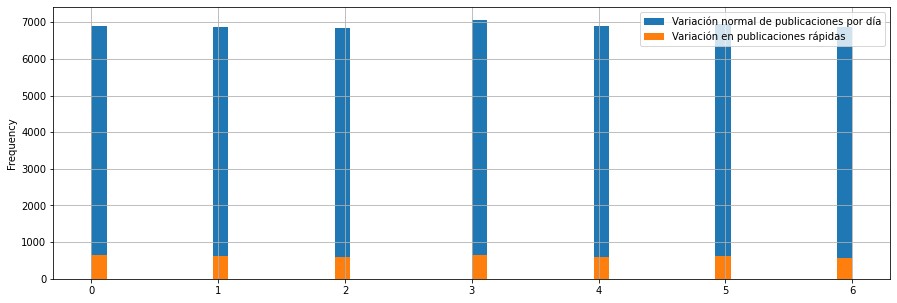

In [281]:
# Histogramas de la cantidad de publicaciones por día
vehicles_clean['day_posted'].plot(kind='hist', bins=50, label='Variación normal de publicaciones por día', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['day_posted'].plot(kind='hist', bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

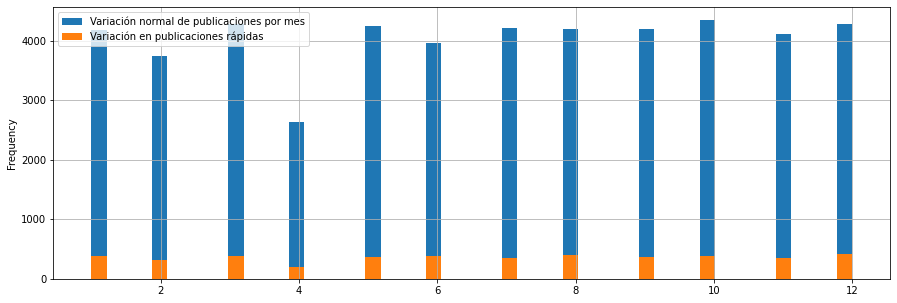

In [282]:
# Histogramas de la cantidad de publicaciones por mes
vehicles_clean['month_posted'].plot(kind='hist', bins=50, label='Variación normal de publicaciones por mes', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['month_posted'].plot(kind='hist', bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

Tanto por día y por mes no se pueden apreciar mayores diferencias entre el conjunto total y las publicaciones que son rápidas.

#### Influencia del modelo del vehículo

Vamos a ver si el top 5 de vehículos publicados cambia. Puede que la porción de publicaciones rápidas correspondan a modelos específicos que tienen una venta rápida.

In [283]:
vehicles_clean['model'].value_counts().head(5)

ford f150                   3114
chevrolet silverado 1500    2045
ram 1500                    1708
chevrolet silverado         1114
jeep wrangler               1018
Name: model, dtype: int64

In [284]:
vehicles_clean.query('days_listed < 10')['model'].value_counts().head(5)

ford f150                   288
chevrolet silverado 1500    187
ram 1500                    160
chevrolet silverado          95
honda accord                 92
Name: model, dtype: int64

Se mantienen los tres primeros lo que nos indicaría que tampoco es un factor relevante para las publicaciones rápidas.

#### Influencia del tipo de vehículo

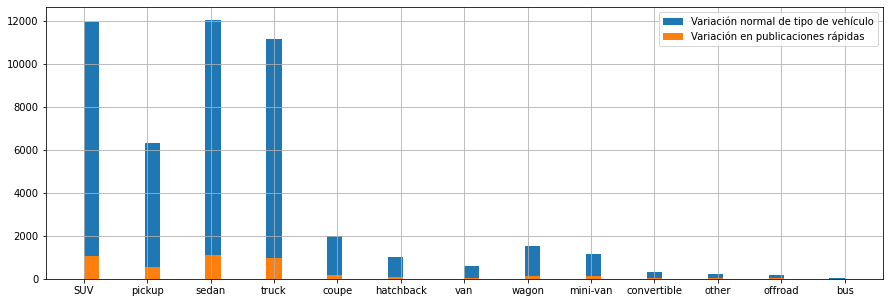

In [285]:
# Histogramas de los tipos de vehículos
vehicles_clean['type'].hist(bins=50, label='Variación normal de tipo de vehículo', grid=True, figsize=(15,5))
vehicles_clean.query('days_listed < 10')['type'].hist(bins=50, label='Variación en publicaciones rápidas', grid=True, figsize=(15,5))
plt.legend()

De acuerdo al tipo de vehículo tampoco se pueden apreciar factores relevantes para las publicaciones rápidas.

### Publicaciones lentas

Definimos como publicaciones lentas aquellas que duran más de 60 días publicadas. Teniendo esto como condición, vamos a analizar los datos.

In [286]:
vehicles_clean.query('days_listed > 60').shape

(9295, 21)

Tenemos 8803 casos de publicaciones lentas, prácticamente el doble que de casos rápidos.

#### Influencia del precio

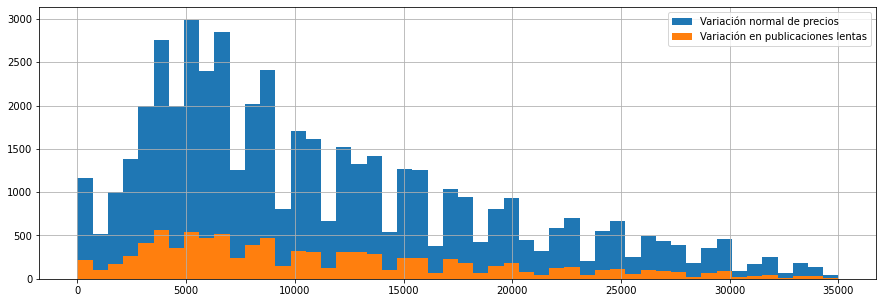

In [287]:
# Comparamos histogramas de la variación de precios.
vehicles_clean['price'].hist(bins=50, label='Variación normal de precios', range=(0,35000), figsize= (15,5))
vehicles_clean.query('days_listed > 60')['price'].hist(bins=50, label='Variación en publicaciones lentas', range=(0,35000), figsize= (15,5))
plt.legend()

Al igual que en las publicaciones rápidas, el patrón y proporciones son muy parecidas.

#### Influencia de la condición

In [288]:
vehicles_clean.query('days_listed > 60')['condition'].value_counts()

excellent    4509
good         3667
like new      838
fair          248
salvage        21
new            12
Name: condition, dtype: int64

In [289]:
vehicles_clean['condition'].value_counts()

excellent    23485
good         19105
like new      4262
fair          1336
salvage        103
new             94
Name: condition, dtype: int64

No hay alguna condición que sobresalga, siguen siendo las mismas en primeros lugares y con proporciones similares.

#### Influencia de la antiguedad del vehículo

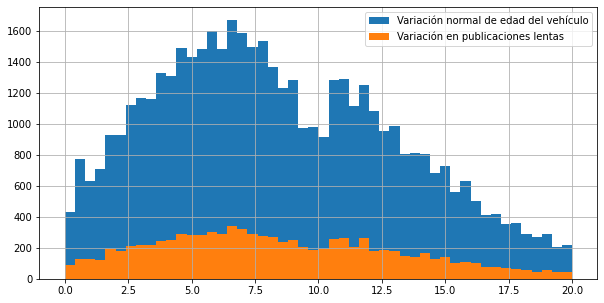

In [290]:
# Histogramas de edad del vehículo
vehicles_clean['vehicle_age'].hist(bins=50, label='Variación normal de edad del vehículo', range=(0,20), figsize= (10,5) )
vehicles_clean.query('days_listed > 60')['vehicle_age'].hist(bins=50, label='Variación en publicaciones lentas', range=(0,20), figsize= (10,5))
plt.legend()

A diferencia de las publicaciones rápidas, en las lentas resaltan mucho más los vehículos que alcanzan una edad aproximada de 7 años. Sigue de mejor manera la tendencia del conjunto de datos total.

#### Influencia del millaje

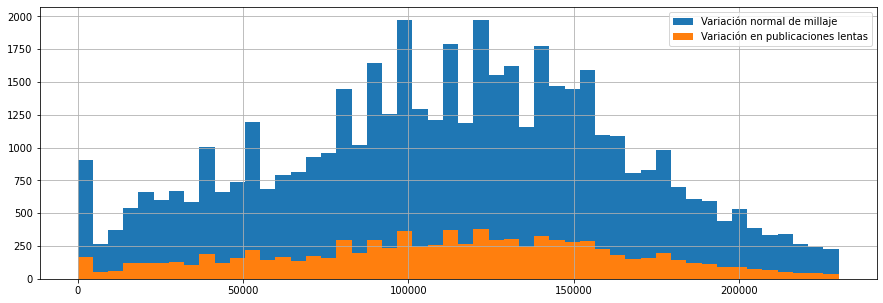

In [291]:
vehicles_clean['odometer'].hist(bins=50, label='Variación normal de millaje', range=(0,230000), figsize= (15,5) )
vehicles_clean.query('days_listed > 60')['odometer'].hist(bins=50, label='Variación en publicaciones lentas', range=(0,230000), figsize= (15,5))
plt.legend()

No hay mayor influencia del millaje para las publicaciones lentas.

#### Influencia de la cantidad de cilindros

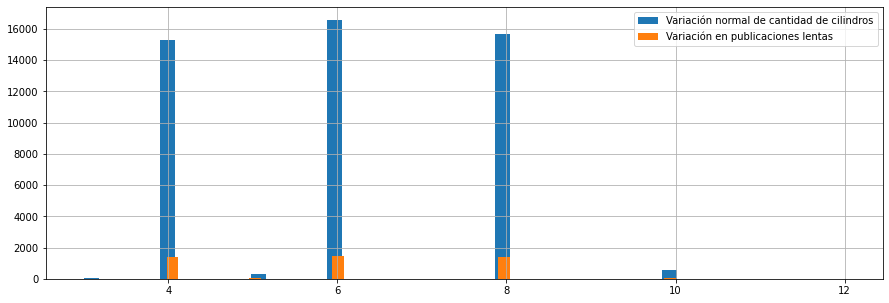

In [292]:
vehicles_clean['cylinders'].hist(bins=50, label='Variación normal de cantidad de cilindros', figsize= (15,5) )
vehicles_clean.query('days_listed < 10')['cylinders'].hist(bins=50, label='Variación en publicaciones lentas', figsize= (15,5))
plt.legend()

La cantidad de cilindros se mantiene proporcional y no varía mucho de las proporciones vistas en el conjunto total.

#### Influencia del mes y día de la semana

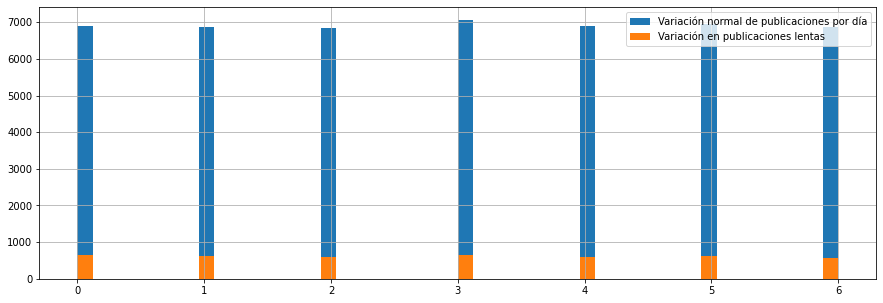

In [293]:
# Histogramas de la cantidad de publicaciones por día
vehicles_clean['day_posted'].hist(bins=50, label='Variación normal de publicaciones por día', figsize=(15,6))
vehicles_clean.query('days_listed < 10')['day_posted'].hist(bins=50, label='Variación en publicaciones lentas', figsize=(15,5))
plt.legend()

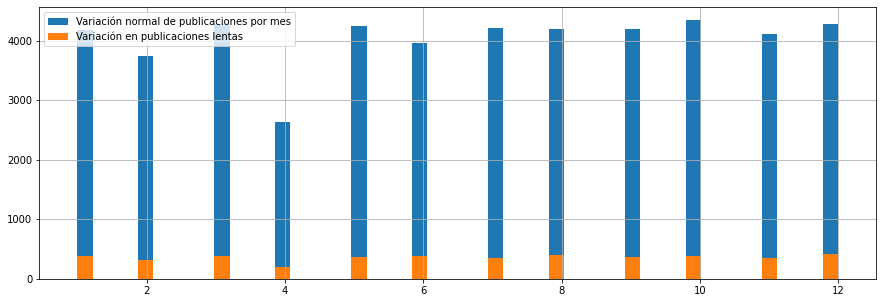

In [294]:
# Histogramas de la cantidad de publicaciones por mes
vehicles_clean['month_posted'].hist(bins=50, label='Variación normal de publicaciones por mes', figsize=(15,6))
vehicles_clean.query('days_listed < 10')['month_posted'].hist(bins=50, label='Variación en publicaciones lentas', figsize=(15,5))
plt.legend()

Tanto los días como los meses no son un factor relevante. Tanto para publicaciones lentas y rápidas, sigue siendo abril el mes con menor cantidad de publicaciones.

#### Influencia del modelo del vehículo

In [295]:
vehicles_clean['model'].value_counts().head(5)

ford f150                   3114
chevrolet silverado 1500    2045
ram 1500                    1708
chevrolet silverado         1114
jeep wrangler               1018
Name: model, dtype: int64

In [296]:
vehicles_clean.query('days_listed < 10')['model'].value_counts().head(5)

ford f150                   288
chevrolet silverado 1500    187
ram 1500                    160
chevrolet silverado          95
honda accord                 92
Name: model, dtype: int64

Tanto para publicaciones lentas y rápidas, el top de vehículos se mantiene similar.

#### Influencia del tipo de vehículo

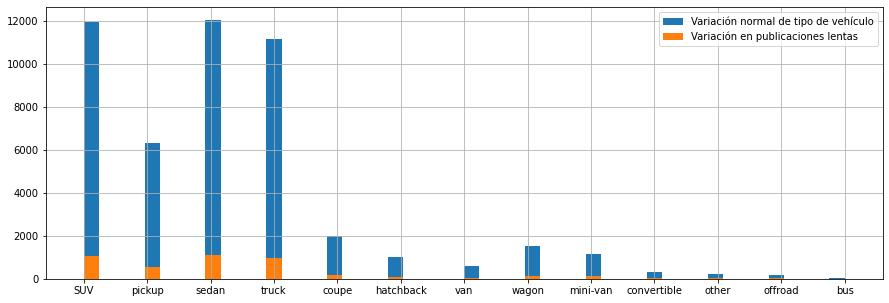

In [297]:
# Histogramas de los tipos de vehículo
vehicles_clean['type'].hist(bins=50, label='Variación normal de tipo de vehículo', figsize=(15,6))
vehicles_clean.query('days_listed < 10')['type'].hist(bins=50, label='Variación en publicaciones lentas', figsize=(15,5))
plt.legend()

Las proporciones en el tipo de vehículo son muy similares a las de las publicaciones rápidas, siendo el tipo sedan el más publicado, seguido del tipo SUV y truck.

**Ya observamos de acuerdo a todas las variables posibles la presencia de algún factor relevante que determine la razón de las publicaciones rápidas y lentas. No pudimos encontrar ningún factor relevante ya que en ambos casos, el comportamiento era muy similar al total del conjunto de datos.**

## Precio promedio por cada tipo de vehículo


Analizaremos el precio y cantidad de anuncios por cada tipo de vehículo para entender en más profundidad la relación que pueden establecer.

In [298]:
# Creamos una tabla dinámica con el precio medio para cada vehículo y la cantidad publicada.
median_price_by_type = vehicles_clean.pivot_table(index='type', values='price', aggfunc=['median','count'])


In [299]:
# Reseteamos el índice de la tabla dinámica y pasamos model_year como columna
median_price_by_type['type'] = median_price_by_type.index
median_price_by_type = median_price_by_type.reset_index(drop=True)
# Cambiamos el nombre de las columnas
median_price_by_type.columns = ['median', 'count', 'type']
median_price_by_type.sort_values(by='count', ascending= False)

,median,count,type
9,5995.0,12029,sedan
0,8795.0,11917,SUV
10,14899.0,11123,truck
8,13999.0,6299,pickup
3,12999.0,2001,coupe
12,7900.0,1506,wagon
5,6500.0,1147,mini-van
4,5990.0,1005,hatchback
11,7800.0,584,van
2,12991.5,338,convertible


<AxesSubplot:title={'center':'Average price by type'}, xlabel='type'>

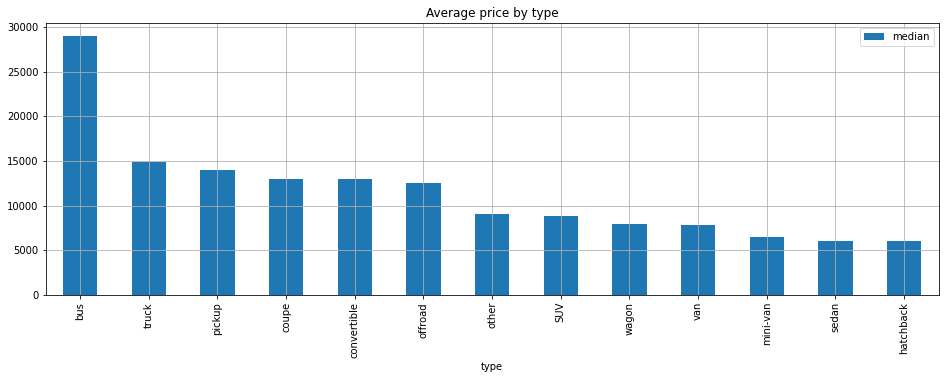

In [300]:
median_price_by_type.sort_values(by='median', ascending= False).plot(y='median', x='type', kind='bar', title='Average price by type', grid='True', figsize=(16,5))

Los precios medios no superan los 15 mil, savo para los buses en los que llega a casi el doble. Dejando de lado este tipo, tenemos el siguiente orden de precios:

-  Rango entre 10 mil y 15 mil: convertible, coupe, offroad, pickup y truck.
-  Rango bajo los 10 mil: SUV, hatchback, mini-van, otros, sedan, van y wagon.

<AxesSubplot:title={'center':'Count by type'}>

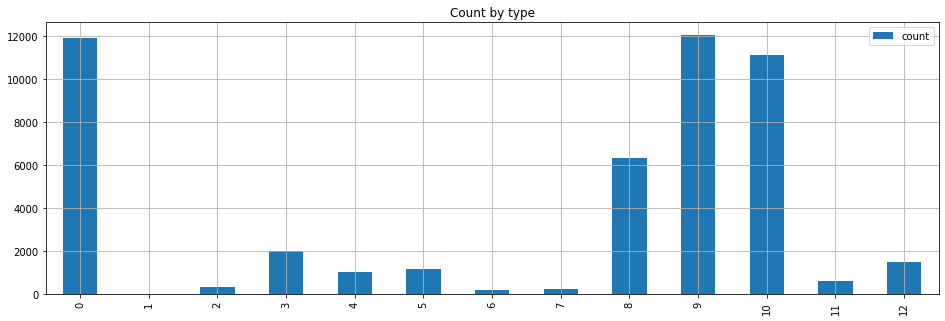

In [301]:
# Gráfico de cantidad de publicaciones por tipo
median_price_by_type.plot(y='count', kind='bar', title='Count by type', grid='True', figsize=(16,5))

El tipo de vehículo más publicado es el sedan con casi 12 mil publicaciones; lo sigue de cerca el SUV, con una cantidad solo un poco menor; y luego el truck que sobrepasa por poco las 10 mil publicaciones.

Después se produce un salto bastante grande hasta el pickup con cerca de 6000 publicaciones; para luego producirse otro salto bastante grande para el resto de vehículos, los que tienen bajo 2000 publicaciones.

## Factores de precio

Debido a la gran diferencia de cantidad de publicaciones en distintos tipos de vehículo, tomaremos los más populares para estudiar qué factores impactan en su precio.

Los tipos más populares que vamos a considerar son:

-  sedan
-  SUV
-  truck
-  pickup

Los tipos restantes tienen bajo 2000 publicaciones cada uno; los que en su suma aproximadamente constituyen 10 mil datos, una quinta parte del conjunto total.

### Caso sedan

#### Influencia de la edad del vehículo

<AxesSubplot:title={'center':'Sedan, price by age'}, xlabel='vehicle_age', ylabel='price'>

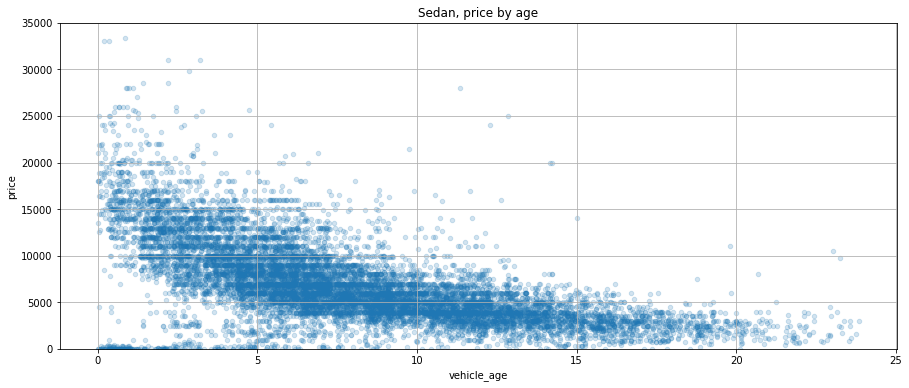

In [302]:
vehicles_clean.query(
    'type == "sedan"').plot(
    x='vehicle_age', y='price', kind='scatter', ylim= (0,35000), title='Sedan, price by age', grid=True, figsize=(15,6), alpha=0.2 )

-  La dispersión de precios de acuerdo a la edad se presenta de forma ordenada. 
-  A medida que aumentan los años del vehículo, disminuye el precio.
-  Salvo valores atípicos, el rango máximo de precio está aproximadamente cercano a 20 mil; mientras que el mínimo oscila entre los 2 mil cuando el vehículo ya tiene 20 años.
-  Existen algunos casos en que el precio se presenta como 0 o cercano al 0 para todas las edades, en especial los primeros años. Esto puede tener como razón que muchos vendedores no fijan un precio estático sino que lo sujetan a un estado de "conversable".

#### Influencia del millaje

<AxesSubplot:title={'center':'Sedan, price by odometer'}, xlabel='odometer', ylabel='price'>

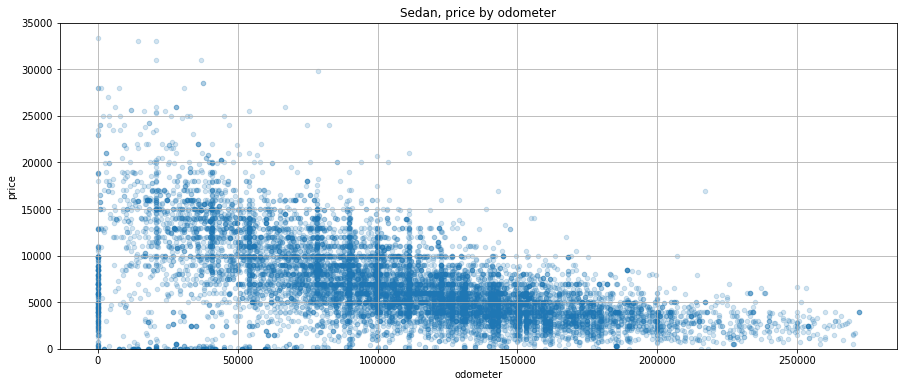

In [303]:
vehicles_clean.query(
    'type == "sedan"').plot(
    x='odometer', y='price', kind='scatter', ylim= (0,35000), title='Sedan, price by odometer', grid=True, figsize=(15,6), alpha=0.2 )

-  La relación es lineal y presentan una dispersión ordenada. A medida que aumenta el millaje, el precio disminuye.
-  Hay presencia de ciertos trazos horizontales en que para un mismo millaje el precio varía bastante. Esto se nota por ejemplo en el millaje 0, en el que el precio fluctúa entre 12 mil aproximadamente y 0.
-  Lo anterior puede tener su fundamento en la diferencia de edades u otro factor de los que estamos estudiando.
-  La mayor presencia se concentra sobre el millaje de 70 mil y corresponden a precios bajo 10 mil.

#### Influencia de la condición

In [304]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "sedan"')['condition'].value_counts()

excellent    6106
good         4260
like new     1308
fair          267
new            47
salvage        41
Name: condition, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='condition_rate'>

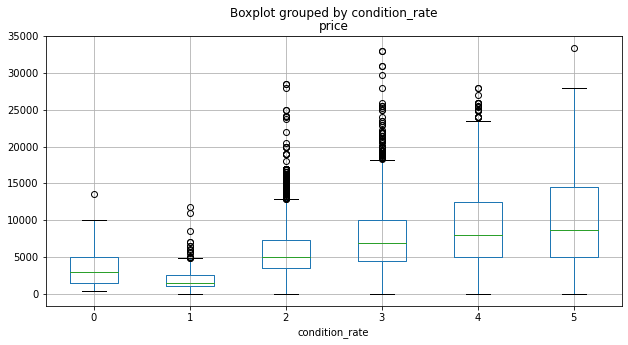

In [305]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "sedan"').boxplot(column='price', by='condition_rate', grid=True, figsize=(10,5))

Recordamos que las condiciones excluídas son new (número 5) y salvage (número 0).

-  Podemos apreciar que de acuerdo a las condiciones, el precio aumenta de acuerdo a la mejora de condición.
-  El incremento de precio se produce de forma lineal y regular. Sus límites superiores también se presentan en una escala ascendente ordenada.
-  En el progreso de cada condición, sus valores máximos van escalando aproximadamente en 5000 el precio.
-  Al igual que en las otras variables analizadas, hay presencia de precios iguales a 0.

#### Influencia del tipo de transmisión

In [306]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "sedan"')['transmission'].value_counts()

automatic    11317
manual         580
other          132
Name: transmission, dtype: int64

Hay una gran diferencia de datos; de todas formas examinaremos su dispersión.

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

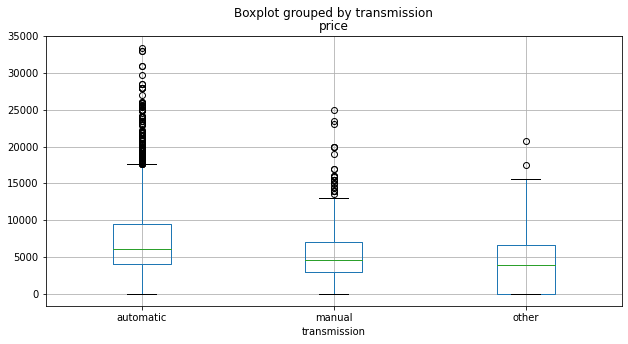

In [307]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "sedan"').boxplot(column='price', by='transmission', grid=True, figsize=(10,5))

-  Las medias de precio se presentan en una progresión ordenada; siendo automatic la característica de mayor valor, seguido de manual y finalmente other.
-  Hay que considerar que other presenta una mayor amplitud de precios que manual, llevando a valores sobre los 15 mil.

#### Influencia del color

In [308]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48385 entries, 0 to 51524
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48385 non-null  int64         
 1   model_year        48385 non-null  int64         
 2   model             48385 non-null  object        
 3   condition         48385 non-null  object        
 4   cylinders         48385 non-null  int64         
 5   fuel              48385 non-null  object        
 6   odometer          48385 non-null  float64       
 7   transmission      48385 non-null  object        
 8   type              48385 non-null  object        
 9   paint_color       48385 non-null  object        
 10  is_4wd            48385 non-null  bool          
 11  date_posted       48385 non-null  datetime64[ns]
 12  days_listed       48385 non-null  int64         
 13  manufacturer      48385 non-null  object        
 14  condition_rate    4838

In [309]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "sedan"')['paint_color'].value_counts()

unknown    2165
silver     2037
black      1758
grey       1615
white      1490
blue       1220
red         936
custom      297
brown       254
green       203
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64

De acuerdo a la cantidad, no consideraremos a purple, yellow y orange por tener menos de 50 registros.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

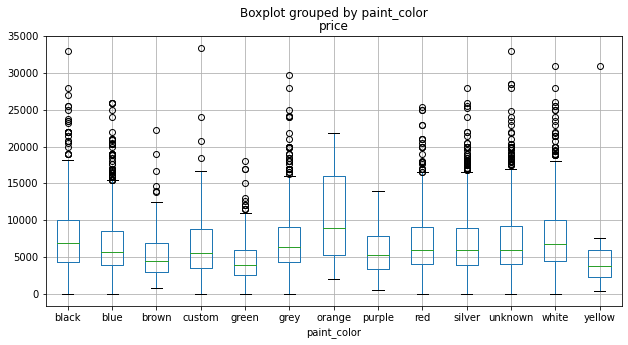

In [310]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "sedan"').boxplot(column='price', by='paint_color', grid=True, figsize=(10,5))

- La distribución de medias de precio es bastante similar en los vehículos sedan.
- Los colores negro y blanco son los de precio más elevado pero por un muy leve márgen.

### Caso SUV

#### Influencia de la edad del vehículo

<AxesSubplot:title={'center':'SUV, price by age'}, xlabel='vehicle_age', ylabel='price'>

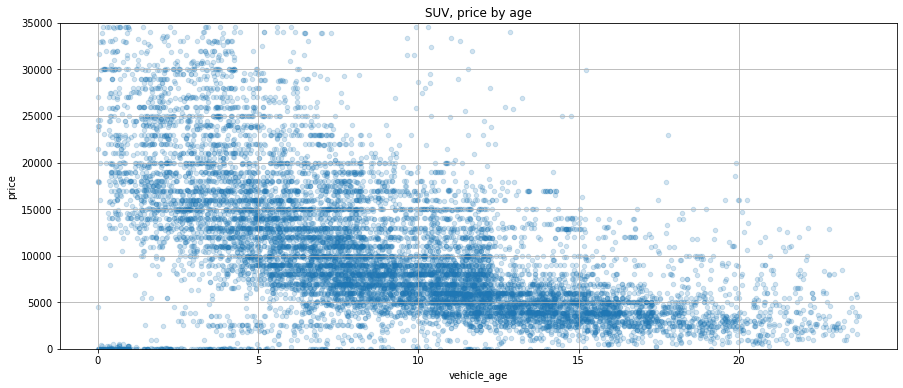

In [311]:
vehicles_clean.query(
    'type == "SUV"').plot(
    x='vehicle_age', y='price', kind='scatter', ylim= (0,35000), title='SUV, price by age', grid=True, figsize=(15,6), alpha=0.2 )

-  A diferencia del sedan, los precios del SUV en relación a la edad del vehículo se nota de forma mucho más dispersa. Esto denota una menor dependencia de esta variable, aunque aún se mantiene la característica de que mientras pasan los años, disminuye el valor del vehículo.
-  Se presenta mayor aglomeración en precios mayores a 20 mil.
-  A pesar de tener casos de precios más altos para los primeros años de vida, luego del quinto año se puede observar una mayor densidad en los registros con valores de precio entre 2500 y 13 mil aproximadamente.
- También se observan registros de precio 0 que pueden responder a precios a conversar.

#### Influencia del millaje

<AxesSubplot:title={'center':'SUV, price by odometer'}, xlabel='odometer', ylabel='price'>

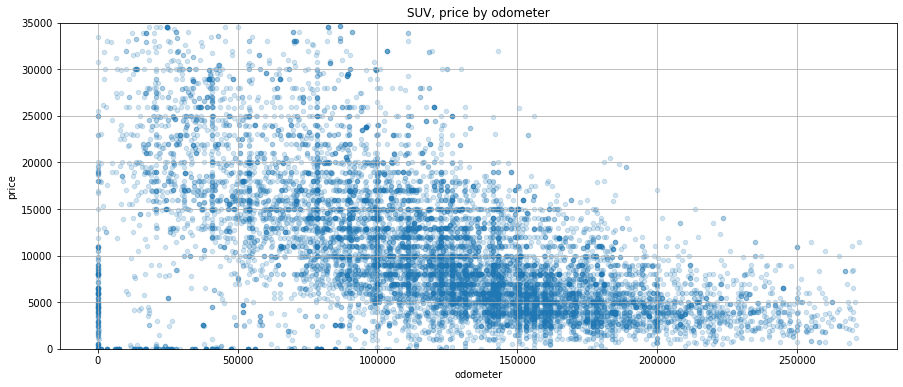

In [312]:
vehicles_clean.query(
    'type == "SUV"').plot(
    x='odometer', y='price', kind='scatter', ylim= (0,35000), title='SUV, price by odometer', grid=True, figsize=(15,6), alpha=0.2 )

-  Ocurre la misma lógica que con la edad del vehículo, los datos se presentan de una manera más dispersa aunque mantienen la relación lineal negativa.
-  Al igual que con el tipo sedan, se presentan trazos claros para millajes en específico.
-  La mayor presencia de datos se concentra bajo los precios de 15 mil y con un millaje mayor a 70 mil aproximadamente. Muy similar a lo que ocurre con el tipo sedan.

#### Influencia de la condición

In [313]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "SUV"')['condition'].value_counts()

excellent    6320
good         4185
like new     1089
fair          289
salvage        17
new            17
Name: condition, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='condition_rate'>

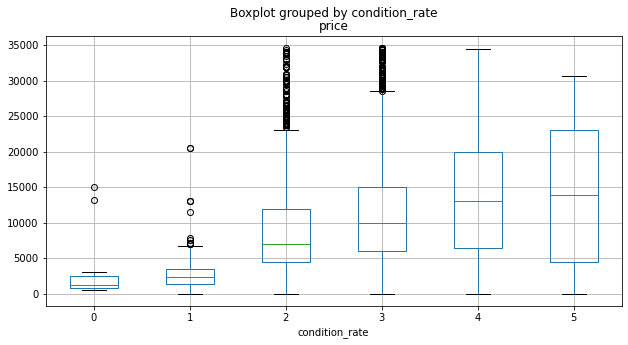

In [314]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "SUV"').boxplot(column='price', by='condition_rate', grid=True, figsize=(10,5))

-  El límite de precios máximo para la condicion fair (1) es de 7000, lo que dista bastante de los límites de las otras condiciones que sobrepasan el precio de 24 mil aproximadamente. Esto indicaría que la valorización de los vehículos tipo SUV decae mucho cuando pasan a estar en un estado "aceptable".

- Las otras condiciones muestran un crecimiento de precios de forma proporcional en la medida que mejora la condición.

#### Influencia del tipo de transmisión

In [315]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "SUV"')['transmission'].value_counts()

automatic    11297
manual         461
other          159
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

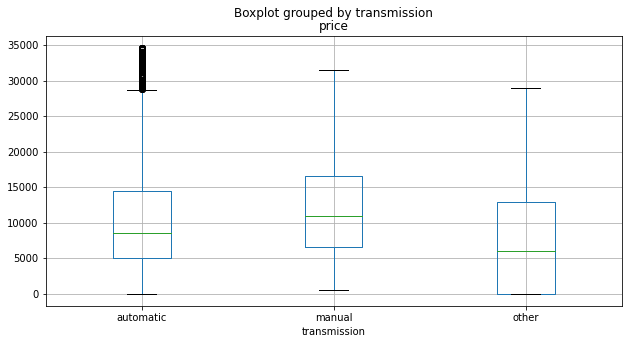

In [316]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "SUV"').boxplot(column='price', by='transmission', grid=True, figsize=(10,5))

-  En cuando a los vehículos SUV, por leves márgenes la característica manual es la que alcanza un mayor valor.
-  Mientras tanto, los límites de precios son similares para todas las transmisiones.

#### Influencia del color

In [317]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "SUV"')['paint_color'].value_counts()

unknown    2141
black      2099
white      1874
silver     1535
grey       1146
blue       1011
red         874
green       421
brown       352
custom      299
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

Dejamos fuera a yellow y purple por contener menos de 50 datos.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

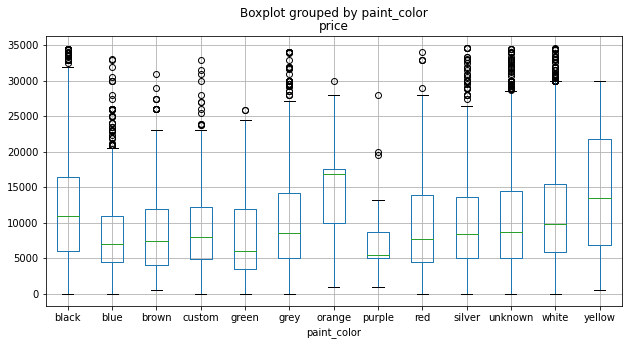

In [318]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "SUV"').boxplot(column='price', by='paint_color', grid=True, figsize=(10,5))

-  En los SUV, si bien el negro y blanco se mantienen en los top por orden de precio medio y límite superior alcanzado; tenemos que considerar el naranjo que hace presencia con una media sobre el precio de 15 mil. Tambien debemos considerar que solo posee 81 registros; en cambio, el negro y blanco sobrepasan los 2 mil cada uno.

### Caso truck

#### Influencia de la edad del vehículo

<AxesSubplot:title={'center':'Truck, price by age'}, xlabel='vehicle_age', ylabel='price'>

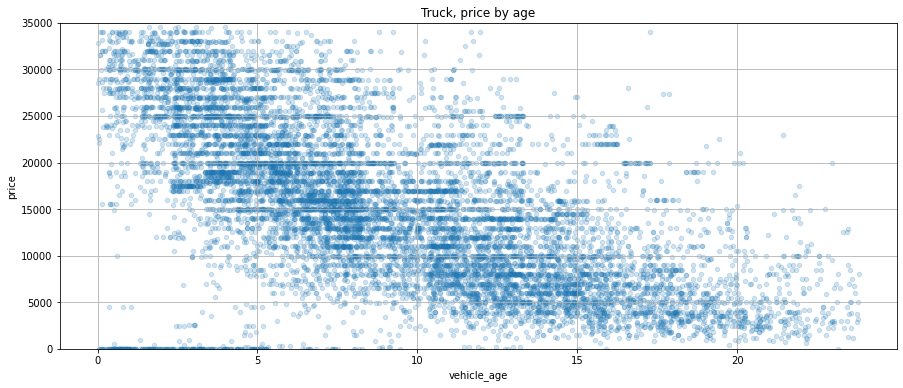

In [319]:
vehicles_clean.query(
    'type == "truck"').plot(
    x='vehicle_age', y='price', kind='scatter', ylim= (0,35000), title='Truck, price by age', grid=True, figsize=(15,6), alpha=0.2 )

-  En cuanto a los camiones, podemos destacar una mayor presencia de registros en un rango alto de precios.
-  Los datos son bastante dispersos perso siguen mostrando la tendencia que indica que el precio disminuye con la edad del vehículo.
-  Gran porción de los datos se encuentra entre las edades de dos años y medio y 10 años. En ellas los valores oscilan entre los 20 mil y 5 mil.
- Siguen apareciendo registros de valor 0.

#### Influencia del millaje

<AxesSubplot:title={'center':'Truck, price by odometer'}, xlabel='odometer', ylabel='price'>

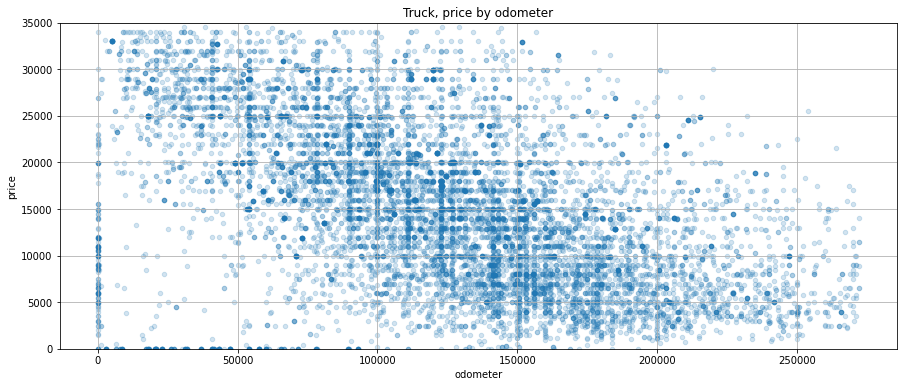

In [320]:
vehicles_clean.query(
    'type == "truck"').plot(
    x='odometer', y='price', kind='scatter', ylim= (0,35000), title='Truck, price by odometer', grid=True, figsize=(15,6), alpha=0.2 )

-  En el caso de los camiones, los datos son muy dispersos, tanto así que casi no se logra apreciar la relación lineal.
-  Tampoco se puede establecer con claridad una concentración mayor en sus datos.
-  De la misma forma que en los tipos anteriores, se presentan trazos lineales para millajes en específico.

#### Influencia de la condición

In [321]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "truck"')['condition'].value_counts()

excellent    5008
good         4921
like new      850
fair          320
new            14
salvage        10
Name: condition, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='condition_rate'>

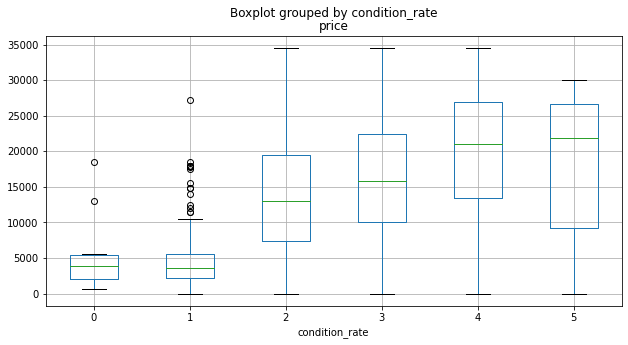

In [322]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "truck"').boxplot(column='price', by='condition_rate', grid=True, figsize=(10,5))

-  Para los camiones también ocurre lo mismo que con las SUV, se devalúan demasiado en una condición aceptable.
-  Si bien las medias ascienden de forma progresiva en cuanto aumenta la condición, su limite superior es prácticamente el mismo. Esto quiere decir que los camiones pueden alcanzar un precio alto de la misma forma, mientras la condición sea superior a buena.

#### Influencia del tipo de transmisión

In [323]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "truck"')['transmission'].value_counts()

automatic    10561
manual         371
other          191
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

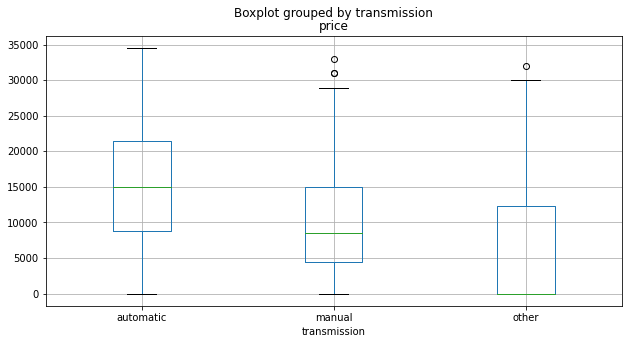

In [324]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "truck"').boxplot(column='price', by='transmission', grid=True, figsize=(10,5))

-  Para los camiones, el tipo automático presenta una media de precio de aproximadmente 10 mil; lo que dista de los otros tipos que tienen medias de precio bajo los 10 mil.
- Ocurre algo interesante en la categoría other, su mediana es de 0; esto indica que de los 190 camiones con este tipo de transmisión, al menos el 50% fue publicado con un precio de 0.

#### Influencia del color

In [325]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "truck"')['paint_color'].value_counts()

white      3346
unknown    1927
black      1397
red         947
silver      933
grey        850
blue        819
custom      299
green       256
brown       227
yellow       65
orange       45
purple       12
Name: paint_color, dtype: int64

Excluirémos los colores orange y purple por presentar menos de 50 registros.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

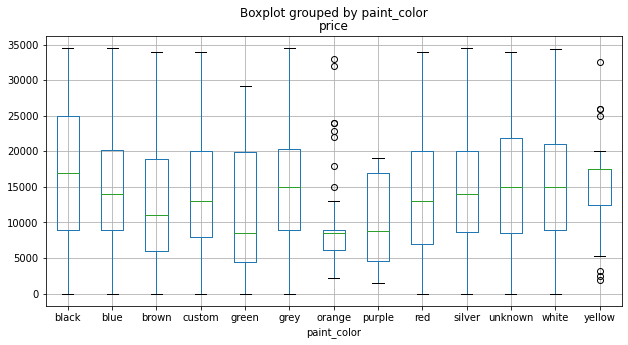

In [326]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "truck"').boxplot(column='price', by='paint_color', grid=True, figsize=(10,5))

-  En cuanto a los camiones, quien alcanza una media de precio más alta es el negro (aproximadamente 17 mil).
- La media en los otros colores es similar al igual que sus límites. Sigue siendo el blanco otro color bien valorado.

### Caso pickup

#### Influencia de la edad del vehículo

<AxesSubplot:title={'center':'Pickup, price by age'}, xlabel='vehicle_age', ylabel='price'>

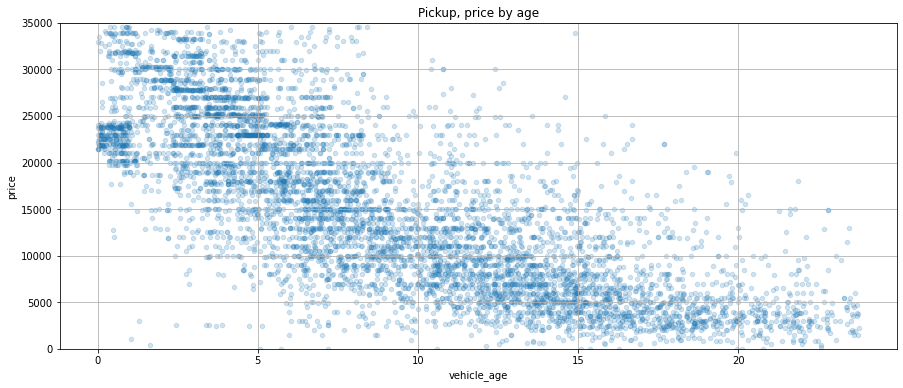

In [327]:
vehicles_clean.query(
    'type == "pickup"').plot(
    x='vehicle_age', y='price', kind='scatter',ylim= (0,35000), title='Pickup, price by age', grid=True, figsize=(15,6), alpha=0.2 )

- La dispersión en los pickup se presenta de forma lineal y relativamente ordenada.
- Se produce una gran presencia en valores altos para edades tempranas del vehículo (hasta los 5 años aproximadamente), en la que los valores fluctuan entre 30 mil y 20 mil.
-  No hay mayor presencia de precios "conversables" iguales a 0.

#### Influencia del millaje

<AxesSubplot:title={'center':'Pickup, price by odometer'}, xlabel='odometer', ylabel='price'>

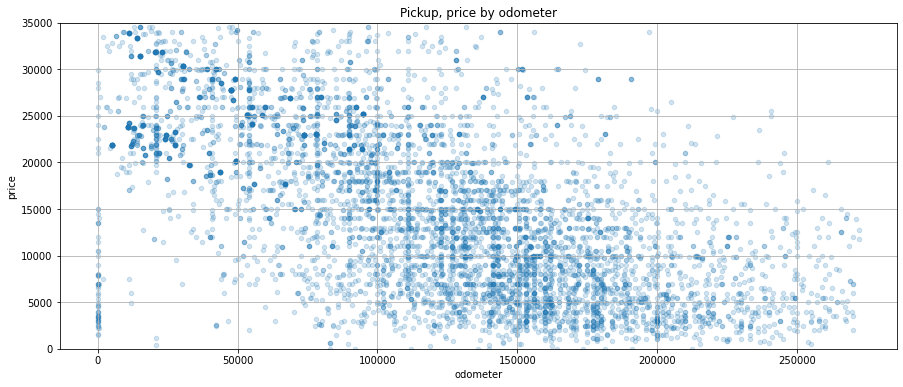

In [328]:
vehicles_clean.query(
    'type == "pickup"').plot(
    x='odometer', y='price', kind='scatter', ylim= (0,35000), title='Pickup, price by odometer', grid=True, figsize=(15,6), alpha=0.2 )

-  Al igual que con los camiones, los datos son dispersos y no presentan un patrón claro.
-  Se mantiene la tendencia lineal negativa pero no es relevante.

#### Influencia de la condición

In [329]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "truck"')['condition'].value_counts()

excellent    5008
good         4921
like new      850
fair          320
new            14
salvage        10
Name: condition, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='condition_rate'>

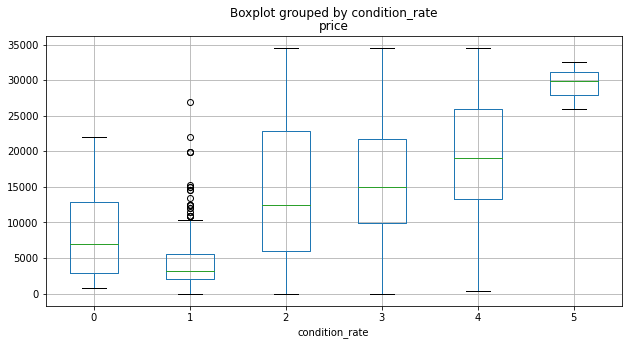

In [330]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "pickup"').boxplot(column='price', by='condition_rate', grid=True, figsize=(10,5))

- En el caso de los tipo pickup sucede algo similar a los camiones y vehículos tipo SUV; se devalúan bastante en una condición aceptable.
- Y al igual que con los camiones los límites superiores son similares mientras la condición sea buena u mejor.

#### Influencia del tipo de transmisión

In [331]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "pickup"')['transmission'].value_counts()

automatic    5406
other         616
manual        277
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

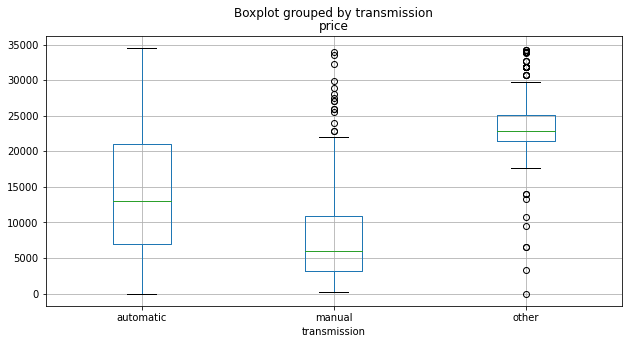

In [332]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "pickup"').boxplot(column='price', by='transmission', grid=True, figsize=(10,5))

-  Para las pickup, la transmisión automática es bastante dispersa en cuanto a valores, alcanzando límites de precio por sobre los 30 mil.
- La categoría manual pasa a ser la de menor valor.
- Es el único caso en la que la transmisión other pasa a ser en su media, la de mayor valor. La mayoría de sus datos están compactados entre los precios de 22 mil y 24 mil aproximadamente.

#### Influencia del color

In [333]:
# Comprobamos la cantidad de datos a evaluar
vehicles_clean.query('type == "pickup"')['paint_color'].value_counts()

white      1635
unknown    1202
black       854
silver      632
red         587
grey        512
blue        459
green       178
brown       158
custom       37
orange       24
yellow       13
purple        8
Name: paint_color, dtype: int64

Restaremos del análisis a custom, orange, yellow y purple por presentar menos de 50 registros.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

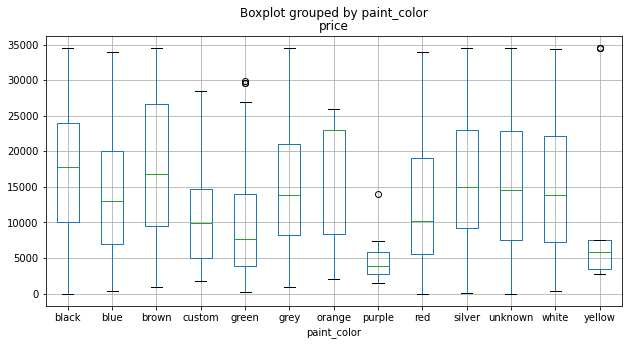

In [334]:
# Creamos un diagrama de caja
vehicles_clean.query(
    'type == "pickup"').boxplot(column='price', by='paint_color', grid=True, figsize=(10,5))

- Si bien el negro contempla la media de precio más alta, asoma el color café con una valoración mejor incluso que el color blanco.
- En esta ocasión, el color blanco presenta una media de precios similar a plateado, seguida de cerca por el gris y el azul.

### Matriz de correlación

Los valores de correlación entre las variables anteriormente estudiadas nos pueden dar más información del comportamiento de las variables respecto al precio.

Para esto, a partir de nuestro conjunto de datos limpios, eliminaremos las columnas que no necesitamos en el análisis.

In [335]:
vehicles_corr = vehicles_clean.drop(
    ['model_year', 
     'model', 
     'condition', 
     'fuel', 
     'is_4wd', 
     'date_posted', 
     'days_listed', 
     'model_year_group', 
     'manufacturer', 
     'day_posted', 
     'month_posted', 
     'year_posted', 
     'yearly_odometer'], 
    axis=1
)


In [336]:
vehicles_corr.corr()

,price,cylinders,odometer,condition_rate,vehicle_age
price,1.000000,0.311348,-0.442264,0.184336,-0.516778
cylinders,0.311348,1.000000,0.124101,-0.081242,0.151346
odometer,-0.442264,0.124101,1.000000,-0.271604,0.612089
condition_rate,0.184336,-0.081242,-0.271604,1.000000,-0.293833
vehicle_age,-0.516778,0.151346,0.612089,-0.293833,1.000000


De acuerdo a la matriz podemos determinar lo siguiente respecto al precio:

- La relación más fuerte se da con la edad del vehículo.
  -  Es una relación de tipo negativa, es decir, a medida que aumenta la edad, disminuye la valoración del vehículo.
  - Muestra ser el factor más determinante en el valor del vehículo, aún así su dependencia no es tan fuerte y depende de otros factores.
  
- En segundo lugar se encuentra el millaje, con el que también existe una relación negativa.
  - En la medida que aumenta el millaje, la valoración del vehículo disminuye.
  - Esto se observó en los gráficos de dispersión vistos por cada tipo de vehículo; si bien para algunos casos se demostraba una dispersión mayor, la tendencia se mantenía.
- En tercer lugar, tenemos una relación positiva con la cantidad de cilindros.
  - Siendo las más populares de 4, 6 y 8; el valor aumenta en la medida que la cantidad lo hace, aunque no existe una relación tan dependiente.
- Y por último lugar, tenemos la relación con condition.
  - Tenderíamos a pensar que la condición del vehículo influye directamente en el valor, pero los datos nos demostraron que no.
  - Si bien para la condición "aceptable" los valores bajan considerablemente, sobre la condición "bueno", el precio puede alcanzar altos límites. No se aprecian mayores diferencias de precio entre las condiciones bueno, excelente y como nuevo.

## Conclusión general


Nos encontramos con un conjunto de más de 50 mil registros que presentan las características de vehículos publicados en el sitio web de Crankshaft List.

De acuerdo a los datos proporcionados encontramos lo siguiente:

***Datos ausentes***

 - Se presentaron valores ausentes para las características de: año del modelo, cilindros, millaje, color de pintura y si es 4wd; siendo este último el que más valores ausentes presentaba llegando a un 50% de los datos.
 
- Respecto a esta característica, asumimos que se trataba de un error de tipo de dato; por lo que reemplazamos los valores de 1 a "Yes" y los ausentes a "0".


- En cuanto a las otras características; se analizaron los datos sin valores ausentes para determinar qué patrones podrían influir en estas variables; para así finalmente, reemplazar dichos valores ausentes con datos que representaran de mejor manera la tendencia propia de la variable.

***Transformaciones, correciones y duplicados***

- No se presentaron casos de registros duplicados en el conjunto de datos.

- Existían algunos duplicados implícitos en los nombres de modelos de vehículos. Estos fueron eliminados disminuyendo la cantidad e modelos distintos de 100 a 95.

- Las columnas is_4wd, model_year y cylinders se convierten a datos de tipo entero.

- Date_posted se convierte a tipo datetime.

***Enriquecimiento de datos***

- Se agrupan los años de modelo de auto en la columna model_year_group para poder realizar gráficos comprensibles.

- Se agrupan los modelos de vehículos por fabricante, los que se agregan a una nueva columna (manufacturer), con el fin de facilitar el procesamiento de los datos.

- Creamos tres nuevas columnas asociadas con la fecha de publicación; el día de la semana que se publicó, el mes y el año; todo esto con el fin de establecer conclusiones más precisas en torno a fechas.

- Se agrega una columna con la antiguedad del vehículo a la fecha que se publicó.

- Se agrega una columna que tiene el millaje promedio por año.


***Tratamiento a valores atípicos***

En base al estudio mediante histogramas y diagramas de caja, logramos fijar límites que nos permite enfocarnos en datos que representen de mejor forma la interacción entre las distintas variables.

Para esto creamos un nuevo conjunto de datos del cual fuimos restando los valores atípicos para las variables de: precio, edad del vehículo, millaje, cantidad de cilindros y condición.

En total eliminamos aproximadamente 6000 registros atípicos. Luego de esto comparamos nuestro conjunto de datos antiguo mediante histogramas comparativos para observar si la proporción de datos se mantenía.

***Estudio de los datos limpios***

Primero realizamos observaciones respecto a los periodos de colocación de los anuncios. Determinamos que existen publicaciones "rápidas" que duran menos de 10 días listadas y las "lentas", que duran más de 60 días. El tiempo medio para las publicaciones es de un mes aproximadamente.

Analizamos los distintos factores que podían determinar estas condiciones y no encontramos nada que pudiera dar luces de una respuesta clara.

Finalmente, estudiamos los factores que incidían en el nivel de precios. Para lograr mayor exactitud en el análisis, estudiamos los tipos de vehículos más publicados; entre ellos se encuentran: sedan, SUV, truck y pickup.

Nos encontramos que existen diferentes factores para cada uno que determinan un precio más elevado u bajo, pero en general para todos es un factor la edad del vehículo y el millaje. Mientras más avanzado de edad el vehículo o mayor millaje posea, su valorización tiende a descender.

Si bien podemos pensar que la condición del vehículo es un factor relevante, nos encontramos que los precios de un vehículo en buena condición pueden ser igual de autos que uno en una condición excelente u como nuevo. El descenso en precios solo se produce para vehículos en una condición "aceptable" u inferior. Esto quedó confirmado con la matriz de correlación que estudiamos.

Si bien para estos tipos de vehículo los colores predilectos y más valorados son el negro y blanco, hay otras características en las que difieren, como por ejemplo, en el tipo de transmisión. Los precios según el tipo de transmisión varían dependiendo del tipo de vehículo.
